In [75]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from matplotlib.ticker import FuncFormatter
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.patches import Ellipse
from matplotlib.patches import Patch
from pointpats import QStatistic
from matplotlib.lines import Line2D
from shapely.geometry import Point
from pointpats import random
from pointpats import distance_statistics
from sklearn.neighbors import KernelDensity

In [76]:
print("Análisis de la distribución espacial de depósitos Ígneo/Metamórficos en Colombia \n \n >>Pregunta: ¿Los depositos minerales en Colombia, relacionados con procesos Ígneo/Metamórficos, \n siguen patrones o están asociados a variables que pueden llegar a explicar su distribucion \n y ayudar con su prediccion de ubicacion?")

Análisis de la distribución espacial de depósitos Ígneo/Metamórficos en Colombia 
 
 >>Pregunta: ¿Los depositos minerales en Colombia, relacionados con procesos Ígneo/Metamórficos, 
 siguen patrones o están asociados a variables que pueden llegar a explicar su distribucion 
 y ayudar con su prediccion de ubicacion?


In [77]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)
depositos = "C:/Git_SCA/AGE/Depositos/Depositos.shp"
gdf = gpd.read_file(depositos)
print("\nINSUMOS \n")
print("\nVista previa completa Ocurrencia de Depositos:")
print(gdf.head())
print(gdf.head())


INSUMOS 


Vista previa completa Ocurrencia de Depositos:
                             IG_EST  IG_DEP   IG_MUN            IG_POB  IG_LAT_W84  IG_LON_W84                D_PR_PAL1                  D_MI_PAL1                         D_CLAS_DEP             R_RO_HUES                   geometry
0  Productor pasado - Cielo abierto   Valle  Bolívar           Bolívar    4.316845  -76.229189          Magnesita-MgCO3            Magnesita-MgCO3  Asociado_a_magmas_máficos_básicos  ROCA_ÍGNEA_PLUTÓNICA  POINT (-76.22919 4.31684)
1         Productor - Cielo abierto   Valle  Bolívar           Bolívar    4.334440  -76.197300          Magnesita-MgCO3            Magnesita-MgCO3  Asociado_a_magmas_máficos_básicos  ROCA_ÍGNEA_PLUTÓNICA   POINT (-76.1973 4.33444)
2                        Ocurrencia  Caldas    Neira             Neira    5.157379  -75.605610  Crisotilo-Mg3Si2O5(OH)4  Crisotilo-Mg3(Si2O5)(OH)4  Asociado_a_magmas_máficos_básicos      ROCA_METAMÓRFICA  POINT (-75.60561 5.15738)
3                

In [78]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)
depositos = "C:/Git_SCA/AGE/Corteza"
gdf = gpd.read_file(depositos)
print("\nINSUMOS \n")
print("\nVista previa completa Profundidad de Moho:")
print(gdf.head())


INSUMOS 


Vista previa completa Profundidad de Moho:
      X     Y          Z                     geometry
0 -90.0  15.0  40.501598     POINT Z (-90 15 40.5016)
1 -89.5  15.0  38.480438  POINT Z (-89.5 15 38.48044)
2 -89.0  15.0  37.246517    POINT Z (-89 15 37.24652)
3 -88.5  15.0  36.913651  POINT Z (-88.5 15 36.91365)
4 -88.0  15.0  37.215492    POINT Z (-88 15 37.21549)


In [79]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)
depositos = "C:/Git_SCA/AGE/Dataciones"
gdf = gpd.read_file(depositos)
print("\nINSUMOS \n")
print("\nVista previa completa Dataciones:")
print(gdf.tail())


INSUMOS 


Vista previa completa Dataciones:
      OBJECTID  IDDatacion CodigoMues                                   UnidadGeol              Litologia EdadAñosB ErrorAños EdadMa ErrorMa EdadGraSim EdadGraS_1    EdadEstrat EdadesHere MetodoData MaterialAn RelacionIn  MSWD   PX2 Dispersion NumeroGran NumeroAlic                                                                         FuenteGeor  Coordenada  Coordena_1            SistemaCoo           Latitud           Longitud                                                                                                                                                                                                   Referencia      CitaRefere IDReferenc                                                                                                                                                           Comentario   URL                   geometry
3796      3797        1702      A–746  Complejo Migmatítico de la Cocha Río Téllez  Granodio

In [80]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)
depositos = "C:/Git_SCA/AGE/Geotermica"
gdf = gpd.read_file(depositos)
print("\nINSUMOS \n")
print("\nVista previa completa Gradiente Geotermico:")
print(gdf.head())


INSUMOS 


Vista previa completa Gradiente Geotermico:
   FID  OBJECTID       UWI     NOMBRE_DEL  PROFUNDIDA DEPARTAMEN             CUENCA   LATITUD   LONGITUD    COORDENADA    COORDENA_1  ELEVACIÓN  ELEVACION  TEMPERATUR  BHT__OF_    BHT__OC_  PROFUNDI_1  PROFUNDI_2  TEMPERAT_1  GRADIENTE  GRADIENT_1  NUMERO_DE  AÑO_DE_AC                                OBSERVACIO  RANG_PROF RAN_GRAD                         geometry
0    1       401  00010022  CANO LIMON-29      8092.0     Arauca  Llanos Orientales  6.932829 -71.137380  1.325446e+06  1.259095e+06      468.0   142.6464   27.486768     178.0   81.111111      8092.0   2466.4416   89.513372  21.741582   25.148215       None       2009  Valor de temp nueva selecc_escala 500000  2000-3000    20-40  POINT (-7918585.244 773329.997)
1    2       402  CLIM0003   CANO LIMON-3      8024.0     Arauca  Llanos Orientales  6.942686 -71.123638  1.326960e+06  1.260196e+06      470.0   143.2560   27.483720     191.0   88.333333      8035.0   2449.0680  

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)
depositos = "C:/Git_SCA/AGE/Azufre"
gdf = gpd.read_file(depositos)
print("\nINSUMOS \n")
print("\nVista previa completa Azufre:")
print(gdf.head())


INSUMOS 


Vista previa completa Azufre:
   OBJECTID           CODIGO_MUE TIPO_MUEST   SUBTIPO_MU  FECHA_MUES                        PROYECTO  WGS84_LATI  WGS84_LONG     BOGOTA_EST    BOGOTA_NOR       BOGOTA_ORI     MAGNA_ESTE    MAGNA_NORT       MAGNA_ORIG LABORATORI           SECADO TAMIZADO TRITURACIO PULVERIZAC MALLA_FINA PRETRATAMI          Digestion    ALCANCE_AT  VALOR_ORIG UNIDAD ELEMENTO                 geometry
0         1    167ID-SA-10000841  Sedimento  Activo fino  11/07/2017  Áreas de Interés Mineral (AIM)    5.879205  -75.479082  844776.163420  1.142073e+06  Bogotá [Bogotá]  844777.435848  1.142074e+06  Bogotá [Bogotá]  ALS [ALS]  Secado a estufa  ASTM-80         No         No         No         No  HNO3-HCl-HF-HClO4  Pseudo-total        0.02    per        S  POINT (-75.4791 5.8792)
1         2  167IIIB-SA-10000842  Sedimento  Activo fino  12/07/2017  Áreas de Interés Mineral (AIM)    5.836449  -75.459143  846973.155627  1.137338e+06  Bogotá [Bogotá]  846974.404452  1.1

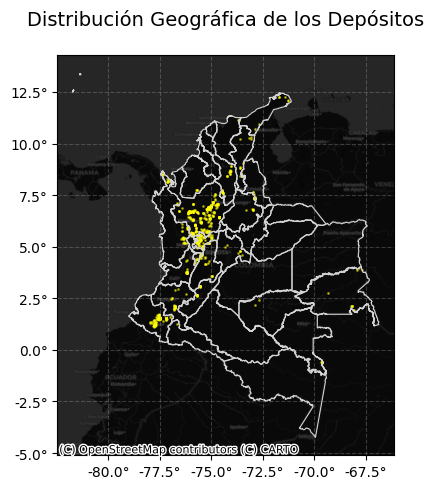

In [81]:
ruta = r"C:/Git_SCA/AGE/Depositos"
gdf = gpd.read_file(ruta)
gdf = gdf.to_crs(epsg=3857)
gdf_latlon = gdf.to_crs(epsg=4326)
gdf['Longitude'] = gdf_latlon.geometry.x
gdf['Latitude'] = gdf_latlon.geometry.y
areas_path = r"C:/Git_SCA/AGE/departamentos"
areas = gpd.read_file(areas_path).to_crs(epsg=4326)
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(gdf['Longitude'], gdf['Latitude'], s=1, c="xkcd:bright yellow", alpha=0.5)
areas.plot(ax=ax, facecolor="none", edgecolor="lightgray", linewidth=0.8)
ctx.add_basemap(ax, crs="EPSG:4326", source=ctx.providers.CartoDB.DarkMatter)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.1f}°"))
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y:.1f}°"))
ax.grid(True, linestyle="--", alpha=0.3)
ax.set_title("Distribución Geográfica de los Depósitos\n", fontsize=14)
plt.tight_layout()
plt.show()


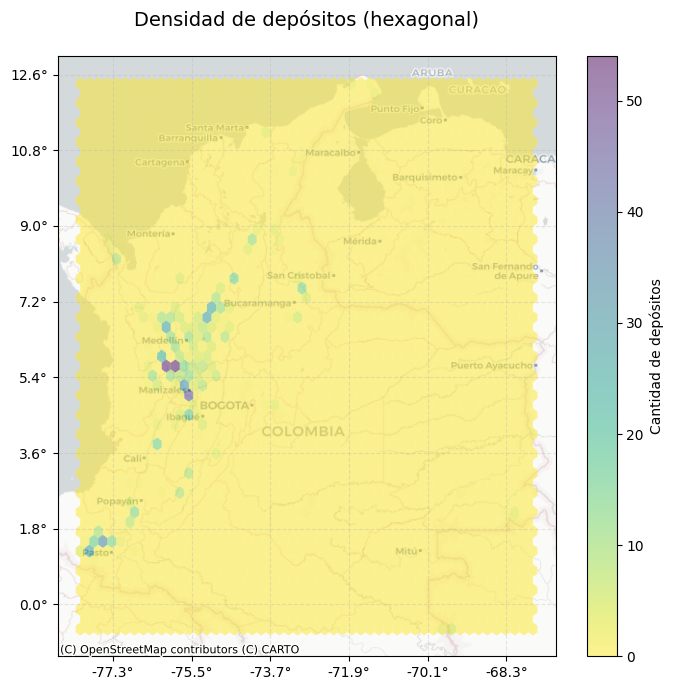

In [82]:
gdf = gpd.read_file(r"C:/Git_SCA/AGE/Depositos").to_crs(epsg=3857)
gdf['x'] = gdf.geometry.x
gdf['y'] = gdf.geometry.y
fig, ax = plt.subplots(1, figsize=(7, 7))
hb = ax.hexbin(
    gdf['x'], gdf['y'],
    gridsize=50,
    linewidths=0,
    alpha=0.5,
    cmap='viridis_r'
)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=gdf.crs)
def mercator_to_lon(x, _): return f"{x * 180 / 20037508.34:.1f}°"
def mercator_to_lat(y, _): return f"{y * 180 / 20037508.34:.1f}°"
ax.xaxis.set_major_formatter(FuncFormatter(mercator_to_lon))
ax.yaxis.set_major_formatter(FuncFormatter(mercator_to_lat))
ax.grid(True, linestyle="--", alpha=0.3)
plt.colorbar(hb, ax=ax, label='Cantidad de depósitos')
ax.set_title("Densidad de depósitos (hexagonal)\n", fontsize=14)
plt.tight_layout()
plt.show()


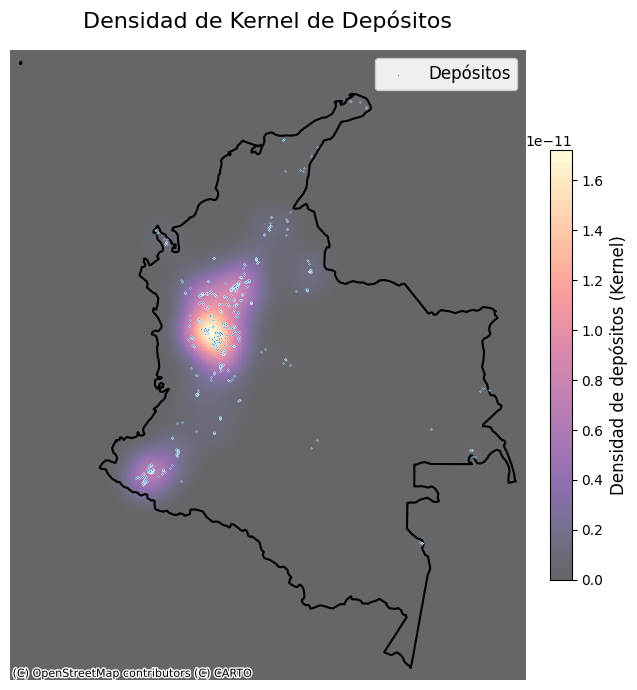

In [83]:

gdf_dep = gpd.read_file("C:/Git_SCA/AGE/Depositos").to_crs(epsg=3857)
gdf_col = gpd.read_file("C:/Git_SCA/AGE/Area_Col").to_crs(epsg=3857)
coords = np.vstack([gdf_dep.geometry.x, gdf_dep.geometry.y]).T
kde = KernelDensity(bandwidth=50000, kernel="gaussian", algorithm="ball_tree")
kde.fit(coords)
minx, miny, maxx, maxy = gdf_col.total_bounds
pad = 0.02  # pequeño margen
dx, dy = maxx-minx, maxy-miny
minx, maxx = minx-pad*dx, maxx+pad*dx
miny, maxy = miny-pad*dy, maxy+pad*dy
n = 400
xv = np.linspace(minx, maxx, n)
yv = np.linspace(miny, maxy, n)
X, Y = np.meshgrid(xv, yv)
grid_pts = np.vstack([X.ravel(), Y.ravel()]).T
Z = np.exp(kde.score_samples(grid_pts)).reshape(n, n)
fig, ax = plt.subplots(1,1, figsize=(7,7))
ax.set_facecolor("white")
ctx.add_basemap(
    ax, 
    source=ctx.providers.CartoDB.Positron, 
    zoom=6, 
    alpha=0.5
)
mesh = ax.pcolormesh(
    X, Y, Z, 
    cmap="magma", 
    shading="auto", 
    alpha=0.6,
    zorder=1
)
gdf_col.boundary.plot(
    ax=ax, 
    edgecolor="black", 
    linewidth=1.5,
    zorder=2
)
gdf_dep.plot(
    ax=ax,
    markersize=1,
    color="#007acc",
    edgecolor="white",
    linewidth=0.3,
    label="Depósitos",
    zorder=3
)
cbar = fig.colorbar(
    mesh, 
    ax=ax, 
    fraction=0.035, 
    pad=0.04
)
cbar.set_label("Densidad de depósitos (Kernel)", fontsize=12)
cbar.ax.tick_params(labelsize=10)
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
ax.set_axis_off()
ax.legend(
    loc="upper right", 
    frameon=True, 
    framealpha=0.9, 
    fontsize=12
)
ax.set_title(
    "Densidad de Kernel de Depósitos", 
    fontsize=16, 
    pad=16
)
plt.tight_layout()
plt.show()


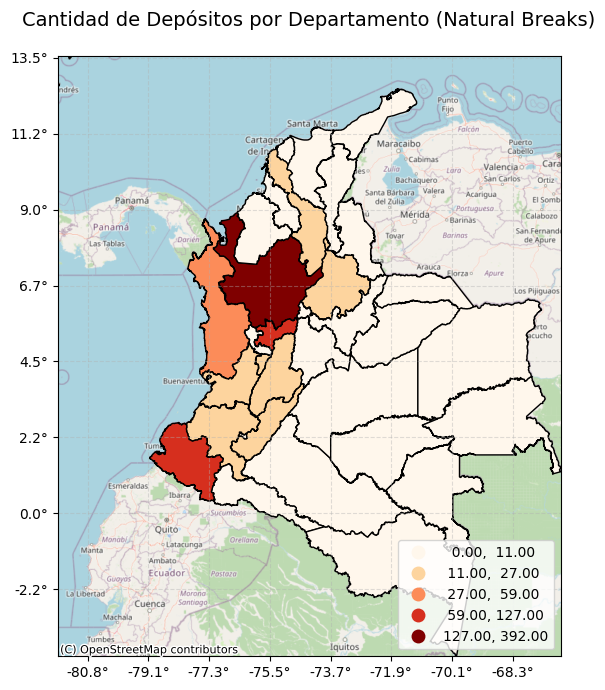

In [84]:
departamentos = gpd.read_file(r"C:/Git_SCA/AGE/departamentos").to_crs(epsg=3857)
join = gpd.sjoin(gdf, departamentos, predicate='within')
conteo = join.groupby('DeNombre').size().reset_index(name='depositos')
departamentos = departamentos.merge(conteo, on='DeNombre', how='left')
departamentos['depositos'] = departamentos['depositos'].fillna(0)
fig, ax = plt.subplots(figsize=(7, 7))
departamentos.plot(
    column='depositos',
    cmap='OrRd',
    scheme='natural_breaks',
    k=5,
    legend=True,
    legend_kwds={'loc': 'lower right'},
    edgecolor='black', linestyle="-",
    ax=ax
)
minx, miny, maxx, maxy = departamentos.total_bounds
ax.set_xlim([minx, maxx])
ax.set_ylim([miny, maxy])
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x * 180 / 20037508.34:.1f}°"))
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y * 180 / 20037508.34:.1f}°"))
ax.grid(True, linestyle="--", alpha=0.4)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs='EPSG:3857')
plt.title("Cantidad de Depósitos por Departamento (Natural Breaks)\n", fontsize=14)
plt.tight_layout()
plt.show()


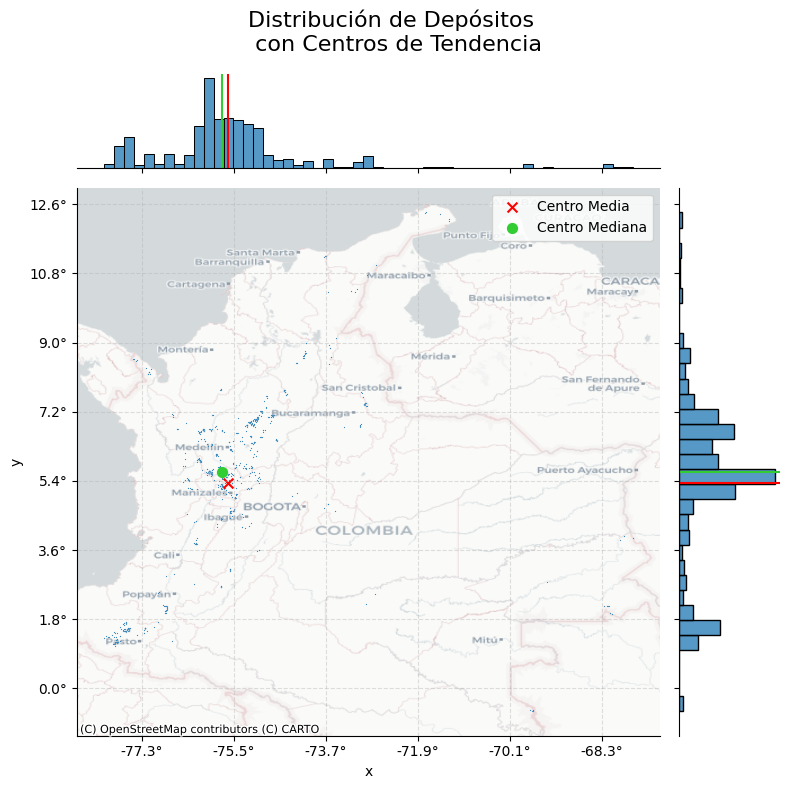

In [85]:
gdf = gpd.read_file("C:/Git_SCA/AGE/Depositos").to_crs(epsg=3857)
gdf['x'] = gdf.geometry.x
gdf['y'] = gdf.geometry.y
mean_center = (gdf['x'].mean(), gdf['y'].mean())
med_center = (gdf['x'].median(), gdf['y'].median())
joint_axes = sns.jointplot(x='x', y='y', data=gdf, s=0.75, height=8)
joint_axes.ax_joint.scatter(*mean_center, color='red', marker='x', s=50, label='Centro Media')
joint_axes.ax_marg_x.axvline(mean_center[0], color='red')
joint_axes.ax_marg_y.axhline(mean_center[1], color='red')
joint_axes.ax_joint.scatter(*med_center, color='limegreen', marker='o', s=50, label='Centro Mediana')
joint_axes.ax_marg_x.axvline(med_center[0], color='limegreen')
joint_axes.ax_marg_y.axhline(med_center[1], color='limegreen')
joint_axes.ax_joint.legend()
ctx.add_basemap(joint_axes.ax_joint, crs="EPSG:3857", source=ctx.providers.CartoDB.Positron)
def mercator_to_lon(x, _): return f"{x * 180 / 20037508.34:.1f}°"
def mercator_to_lat(y, _): return f"{y * 180 / 20037508.34:.1f}°"
joint_axes.ax_joint.xaxis.set_major_formatter(FuncFormatter(mercator_to_lon))
joint_axes.ax_joint.yaxis.set_major_formatter(FuncFormatter(mercator_to_lat))
joint_axes.ax_joint.grid(True, linestyle="--", alpha=0.4)
joint_axes.fig.suptitle("Distribución de Depósitos \n con Centros de Tendencia", fontsize=16)
joint_axes.fig.tight_layout()
joint_axes.fig.subplots_adjust(top=0.90)
plt.show()


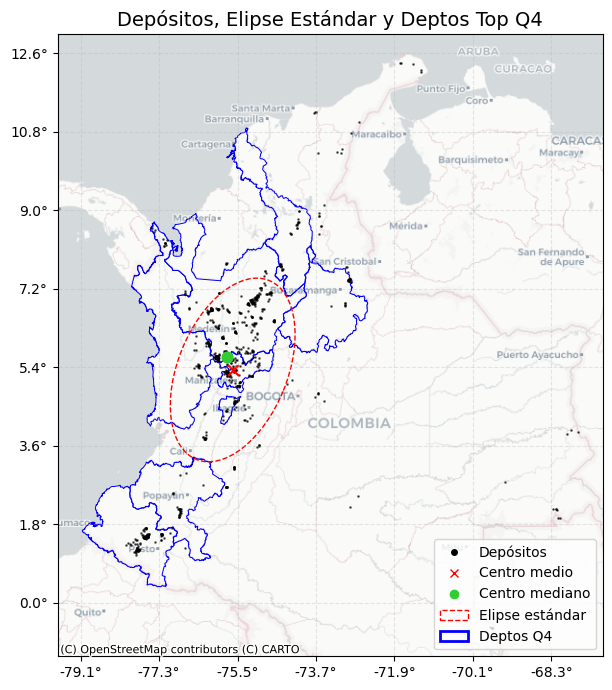

C:\TEMP\ipykernel_5140\548320518.py:59: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(loc='lower right')


<Figure size 640x480 with 0 Axes>

In [86]:
gdf = gpd.read_file(r"C:/Git_SCA/AGE/Depositos").to_crs(epsg=3857)
departamentos = gpd.read_file(r"C:/Git_SCA/AGE/departamentos").to_crs(epsg=3857)
gdf['x'], gdf['y'] = gdf.geometry.x, gdf.geometry.y
joined = gpd.sjoin(gdf, departamentos, predicate='within')
counts = joined.groupby('DeNombre').size().reset_index(name='count')
departamentos = departamentos.merge(counts, on='DeNombre', how='left').fillna({'count': 0})
q4 = departamentos['count'].quantile(0.75)
top_depts = departamentos[departamentos['count'] > q4]
coords = gdf[['x','y']].values
mean_center = coords.mean(axis=0)
med_center = np.median(coords, axis=0)
cov = np.cov(coords.T)
eigs, vecs = np.linalg.eigh(cov)
order = eigs.argsort()[::-1]
eigs, vecs = eigs[order], vecs[:, order]
angle = np.degrees(np.arctan2(*vecs[:,0][::-1]))
width, height = 2*np.sqrt(eigs)
factor_90 = 2.146
ellipse90 = Ellipse(
    xy=mean_center,
    width=width * factor_90,
    height=height * factor_90,
    angle=angle,
    edgecolor='orange',
    facecolor='none',
    linestyle=':',
    linewidth=2,
    label='Elipse 90 %'
)
ax.add_patch(ellipse90)
fig, ax = plt.subplots(figsize=(7,7))
top_depts.plot(ax=ax, facecolor='none', edgecolor='blue', linewidth=0.7, label='Top 25% Deptos')
ax.scatter(gdf['x'], gdf['y'], s=0.75, alpha=0.6, color='black', label='Depósitos')
ax.scatter(*mean_center, color='red', marker='x', s=60, label='Centro medio')
ax.scatter(*med_center, color='limegreen', marker='o', s=60, label='Centro mediano')
ellipse = Ellipse(mean_center, width, height, angle=angle,
                  edgecolor='red', facecolor='none', linestyle='--', label='Elipse estándar')
ax.add_patch(ellipse)
ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.CartoDB.Positron)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x*180/20037508.34:.1f}°"))
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y*180/20037508.34:.1f}°"))
ax.grid(True, linestyle="--", alpha=0.3)
def mercator_to_lon(x, _): return f"{x * 180 / 20037508.34:.1f}°"
def mercator_to_lat(y, _): return f"{y * 180 / 20037508.34:.1f}°"
ax.xaxis.set_major_formatter(FuncFormatter(mercator_to_lon))
ax.yaxis.set_major_formatter(FuncFormatter(mercator_to_lat))
ax.grid(True, linestyle="--", alpha=0.3)
ax.set_title("Depósitos, Elipse Estándar y Deptos Top Q4", fontsize=14)
legend_elements = [
    Line2D([0], [0], marker='o', color='black', label='Depósitos', markersize=4, linestyle='None'),
    Line2D([0], [0], marker='x', color='red', label='Centro medio', markersize=6, linestyle='None'),
    Line2D([0], [0], marker='o', color='limegreen', label='Centro mediano', markersize=6, linestyle='None'),
    Patch(facecolor='none', edgecolor='red', linestyle='--', label='Elipse estándar'),
    Patch(facecolor='none', edgecolor='blue', linewidth=2, label='Deptos Q4')
]
ax.legend(handles=legend_elements, loc='lower right')
plt.tight_layout()
plt.show()
ax.legend(loc='lower right')
ax.set_title("Depósitos, Elipse Estándar y Deptos Top Q4", fontsize=14)
ax.set_axis_off()
plt.tight_layout()
plt.show()


C:\TEMP\ipykernel_5140\2322298005.py:5: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  hull_polygon = gdf_colombia.geometry.unary_union
c:\Git_SCA\AGE\.venv\Lib\site-packages\contextily\tile.py:645: UserWarning: The inferred zoom level of 27 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


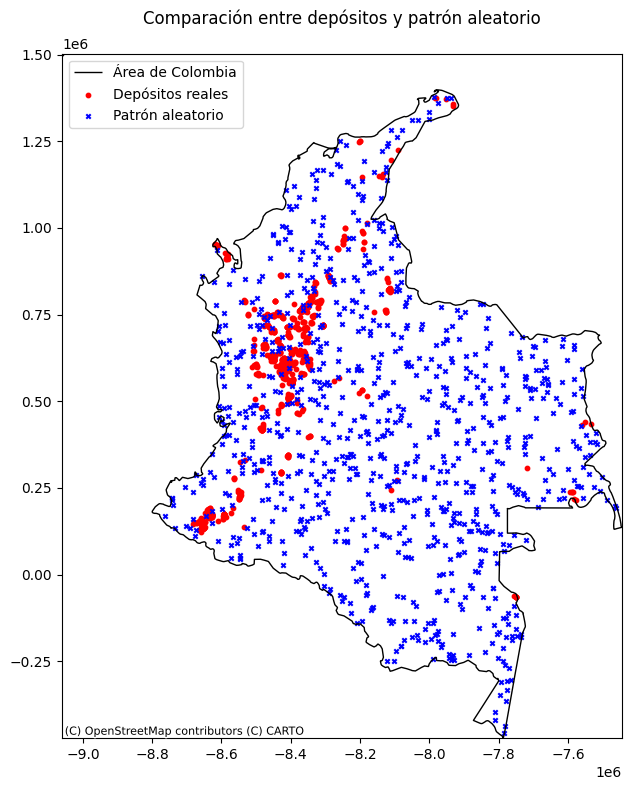

In [87]:
ruta_shape_secundario = r"C:/Git_SCA/AGE/Depositos"
ruta_colombia = r"C:/Git_SCA/AGE/Area_Col"
gdf_secundario = gpd.read_file(ruta_shape_secundario).to_crs(epsg=3857)
gdf_colombia = gpd.read_file(ruta_colombia).to_crs(epsg=3857)
hull_polygon = gdf_colombia.geometry.unary_union
n_points = len(gdf_secundario)
random_points = random.poisson(hull_polygon, size=n_points)
gdf_random = gpd.GeoDataFrame(geometry=[Point(xy) for xy in random_points], crs=gdf_colombia.crs)
fig, ax = plt.subplots(figsize=(8, 8))
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
ax.set_xlim(gdf_colombia.total_bounds[[0, 2]])
ax.set_ylim(gdf_colombia.total_bounds[[1, 3]])
gdf_colombia.boundary.plot(ax=ax, edgecolor='black', linewidth=1, label='Área de Colombia')
gdf_secundario.plot(ax=ax, color='red', markersize=10, label='Depósitos reales')
gdf_random.plot(ax=ax, color='blue', markersize=10, marker='x', label='Patrón aleatorio')
ax.legend()
ax.set_title("Comparación entre depósitos y patrón aleatorio\n")
plt.tight_layout()
plt.show()


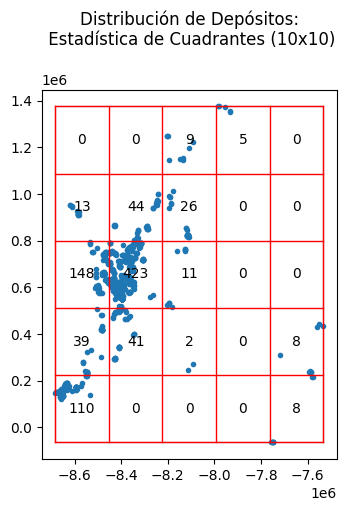

p-valor (chi² test): 0.00000
➡️ Distribución NO aleatoria: hay agrupamiento (clustering) significativo.


In [88]:
ruta_depositos = r"C:/Git_SCA/AGE/Depositos"
gdf = gpd.read_file(ruta_depositos).to_crs(epsg=3857)
gdf['x'] = gdf.geometry.x
gdf['y'] = gdf.geometry.y
coordinates = gdf[['x', 'y']].values
qstat = QStatistic(coordinates, nx=5, ny=5)
qstat.plot()
plt.title("Distribución de Depósitos:\n Estadística de Cuadrantes (10x10)\n")
plt.show()
print(f"p-valor (chi² test): {qstat.chi2_pvalue:.5f}")
if qstat.chi2_pvalue < 0.05:
    print("➡️ Distribución NO aleatoria: hay agrupamiento (clustering) significativo.")
else:
    print("➡️ No hay evidencia significativa de agrupamiento (podría ser aleatoria).")


C:\TEMP\ipykernel_5140\1946150901.py:19: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Git_SCA\AGE\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


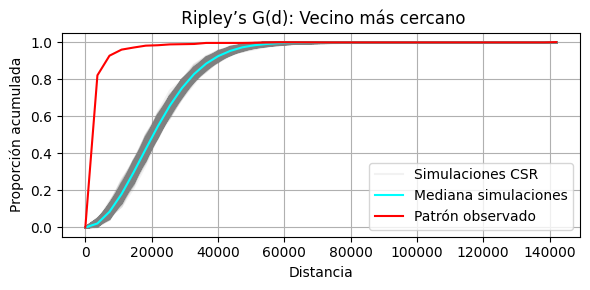

In [89]:
gdf = gpd.read_file(r"C:/Git_SCA/AGE/Depositos").to_crs(epsg=3857)
coordinates = gdf.geometry.apply(lambda geom: (geom.x, geom.y)).to_list()
coordinates = np.array(coordinates)
g_test = distance_statistics.g_test(coordinates, support=40, keep_simulations=True)
plt.figure(figsize=(6, 3))
support_len = len(g_test.support)
for i in range(g_test.simulations.shape[0]):
    if i == 0:
        plt.plot(g_test.support, g_test.simulations[i, :support_len], color='gray', alpha=0.1, label='Simulaciones CSR')
    else:
        plt.plot(g_test.support, g_test.simulations[i, :support_len], color='gray', alpha=0.1)
plt.plot(g_test.support, np.median(g_test.simulations[:, :support_len], axis=0), color='cyan', label='Mediana simulaciones')
plt.plot(g_test.support, g_test.statistic[:support_len], color='red', label='Patrón observado')
plt.title(" Ripley’s G(d): Vecino más cercano")
plt.xlabel("Distancia")
plt.ylabel("Proporción acumulada")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\TEMP\ipykernel_5140\728547752.py:19: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Git_SCA\AGE\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


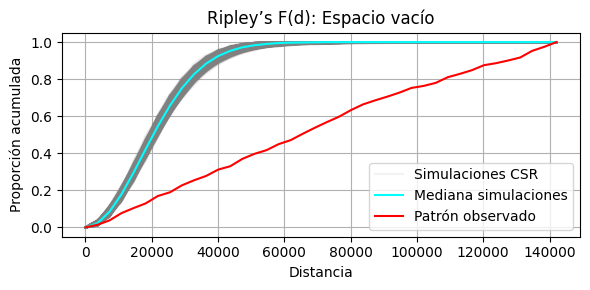

In [90]:
gdf = gpd.read_file(r"C:/Git_SCA/AGE/Depositos").to_crs(epsg=3857)
coordinates = gdf.geometry.apply(lambda geom: (geom.x, geom.y)).to_list()
coordinates = np.array(coordinates)
f_test = distance_statistics.f_test(coordinates, support=40, keep_simulations=True)
plt.figure(figsize=(6, 3))
support_len = len(f_test.support)
for i in range(f_test.simulations.shape[0]):
    if i == 0:
        plt.plot(f_test.support, f_test.simulations[i, :support_len], color='gray', alpha=0.1, label='Simulaciones CSR')
    else:
        plt.plot(f_test.support, f_test.simulations[i, :support_len], color='gray', alpha=0.1)
plt.plot(f_test.support, np.median(f_test.simulations[:, :support_len], axis=0), color='cyan', label='Mediana simulaciones')
plt.plot(f_test.support, f_test.statistic[:support_len], color='red', label='Patrón observado')
plt.title("Ripley’s F(d): Espacio vacío")
plt.xlabel("Distancia")
plt.ylabel("Proporción acumulada")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


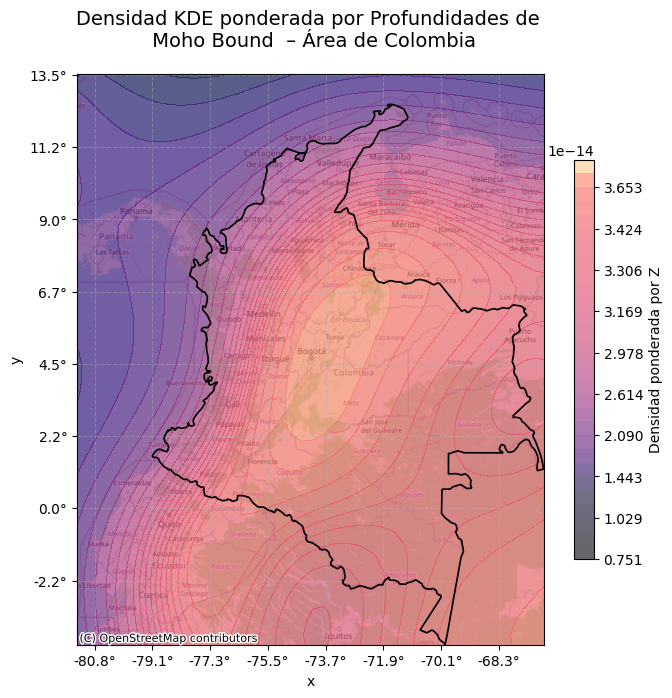

In [91]:
gdf = gpd.read_file("C:/Git_SCA/AGE/Corteza").to_crs(epsg=3857)
colombia = gpd.read_file("C:/Git_SCA/AGE/Area_Col").to_crs(epsg=3857)
colombia = colombia[~colombia.geometry.is_empty & colombia.geometry.is_valid]
#Filtrar puntos dentro de Colombia
#gdf = gdf[gdf.geometry.within(colombia.unary_union)]
df = pd.DataFrame({
    'x': gdf.geometry.x,
    'y': gdf.geometry.y,
    'z': gdf['Z']
})
fig, ax = plt.subplots(figsize=(7, 7))
kde = sns.kdeplot(
    data=df,
    x='x', y='y',
    weights='z',
    fill=True,
    cmap='magma',
    alpha=0.6,
    bw_adjust=0.6,
    levels=30,
    ax=ax
)
colombia.boundary.plot(ax=ax, edgecolor='black', linewidth=1.2)
def mercator_to_lon(x, _): return f"{x * 180 / 20037508.34:.1f}°"
def mercator_to_lat(y, _): return f"{y * 180 / 20037508.34:.1f}°"
ax.xaxis.set_major_formatter(FuncFormatter(mercator_to_lon))
ax.yaxis.set_major_formatter(FuncFormatter(mercator_to_lat))
ax.grid(True, linestyle="--", alpha=0.4)
bounds = colombia.total_bounds
ax.set_xlim(bounds[0], bounds[2])
ax.set_ylim(bounds[1], bounds[3])
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs='EPSG:3857')
mappable = ax.collections[0]
cbar = plt.colorbar(mappable, ax=ax, shrink=0.7, label="Densidad ponderada por Z")
plt.title("Densidad KDE ponderada por Profundidades de \n Moho Bound  – Área de Colombia", fontsize=14, pad=20)
plt.tight_layout()
plt.show()


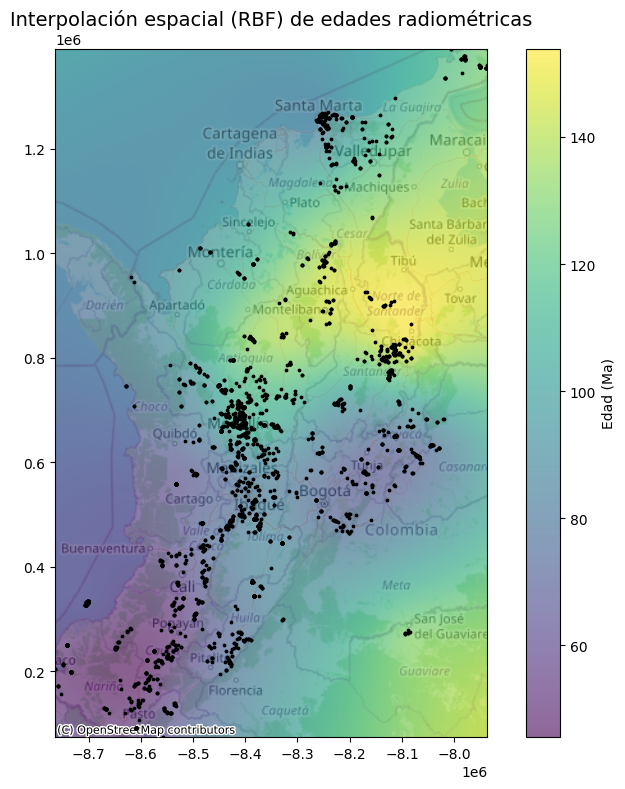

In [92]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf
import contextily as ctx

# === 1. Cargar datos y reproyectar ===
gdf = gpd.read_file("C:/Git_SCA/AGE/Dataciones").to_crs(epsg=3857)

# Convertir EdadMa a float y eliminar nulos
gdf['EdadMa'] = pd.to_numeric(gdf['EdadMa'].str.replace(',', '.'), errors='coerce')
gdf = gdf[gdf['EdadMa'].notna()]

# === 🔍 2. Filtrar edades mayores a 4000 Ma ===
gdf = gdf[gdf['EdadMa'] <= 500]

# === 3. Extraer coordenadas y valores ===
x = gdf.geometry.x.values
y = gdf.geometry.y.values
z = gdf['EdadMa'].values

# === 4. Crear malla regular ===
minx, miny, maxx, maxy = gdf.total_bounds
grid_x, grid_y = np.mgrid[minx:maxx:500j, miny:maxy:500j]

# === 5. Crear modelo RBF e interpolar ===
rbf = Rbf(x, y, z, function='multiquadric', smooth=1000)
grid_z = rbf(grid_x, grid_y)

# === 6. Graficar ===
fig, ax = plt.subplots(figsize=(8, 8))
c = ax.imshow(
    grid_z.T,
    extent=(minx, maxx, miny, maxy),
    origin='lower',
    cmap='viridis',
    alpha=0.6,
    zorder=2
)

# Mapa base y puntos
ctx.add_basemap(ax, crs='EPSG:3857', source=ctx.providers.OpenStreetMap.Mapnik, zorder=1)
gdf.plot(ax=ax, markersize=3, color='black', zorder=3)

# Colorbar y título
plt.colorbar(c, ax=ax, label='Edad (Ma)')
plt.title("Interpolación espacial (RBF) de edades radiométricas", fontsize=14)
plt.tight_layout()
plt.show()


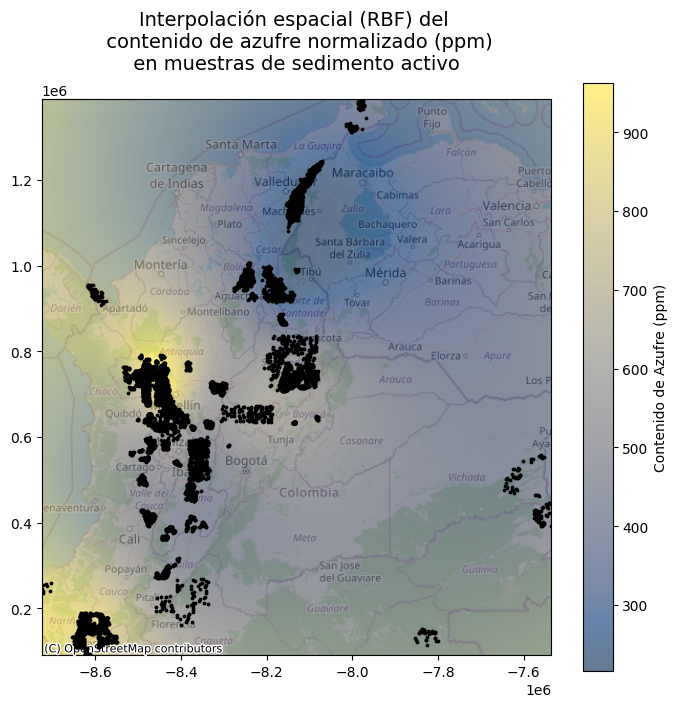

In [93]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf
import contextily as ctx

# === 1. Cargar datos y reproyectar ===
gdf = gpd.read_file("C:/Git_SCA/AGE/Azufre").to_crs(epsg=3857)

# === 2. Convertir columna VALOR_ORIG a numérica
gdf['VALOR_ORIG'] = pd.to_numeric(gdf['VALOR_ORIG'], errors='coerce')
gdf['UNIDAD'] = gdf['UNIDAD'].astype(str).str.strip().str.lower()

# === 3. Filtrar datos válidos
gdf = gdf[gdf['VALOR_ORIG'].notna()]
gdf = gdf[gdf['UNIDAD'].isin(['per', 'ppm'])]  # Solo las unidades que podemos manejar

# === 4. Convertir los valores en porcentaje a ppm
gdf.loc[gdf['UNIDAD'] == 'per', 'VALOR_ORIG'] *= 10000

# === 5. Tomar muestra si hay demasiados puntos
if len(gdf) > 3000:
    gdf_sample = gdf.sample(n=3000, random_state=42)
else:
    gdf_sample = gdf

# === 6. Extraer coordenadas y valores
x = gdf_sample.geometry.x.values
y = gdf_sample.geometry.y.values
z = gdf_sample['VALOR_ORIG'].values

# === 7. Crear malla regular
minx, miny, maxx, maxy = gdf.total_bounds
grid_x, grid_y = np.mgrid[minx:maxx:300j, miny:maxy:300j]

# === 8. Interpolación RBF
rbf = Rbf(x, y, z, function='multiquadric', smooth=1000)
grid_z = rbf(grid_x, grid_y)

# === 9. Graficar
fig, ax = plt.subplots(figsize=(7, 7))
c = ax.imshow(
    grid_z.T,
    extent=(minx, maxx, miny, maxy),
    origin='lower',
    cmap='cividis',
    alpha=0.6,
    zorder=2
)

ctx.add_basemap(ax, crs='EPSG:3857', source=ctx.providers.OpenStreetMap.Mapnik, zorder=1)
gdf.plot(ax=ax, markersize=3, color='black', zorder=3)

plt.colorbar(c, ax=ax, label='Contenido de Azufre (ppm)')
plt.title("Interpolación espacial (RBF) del \n contenido de azufre normalizado (ppm)\n en muestras de sedimento activo \n", fontsize=14)
plt.tight_layout()
plt.show()


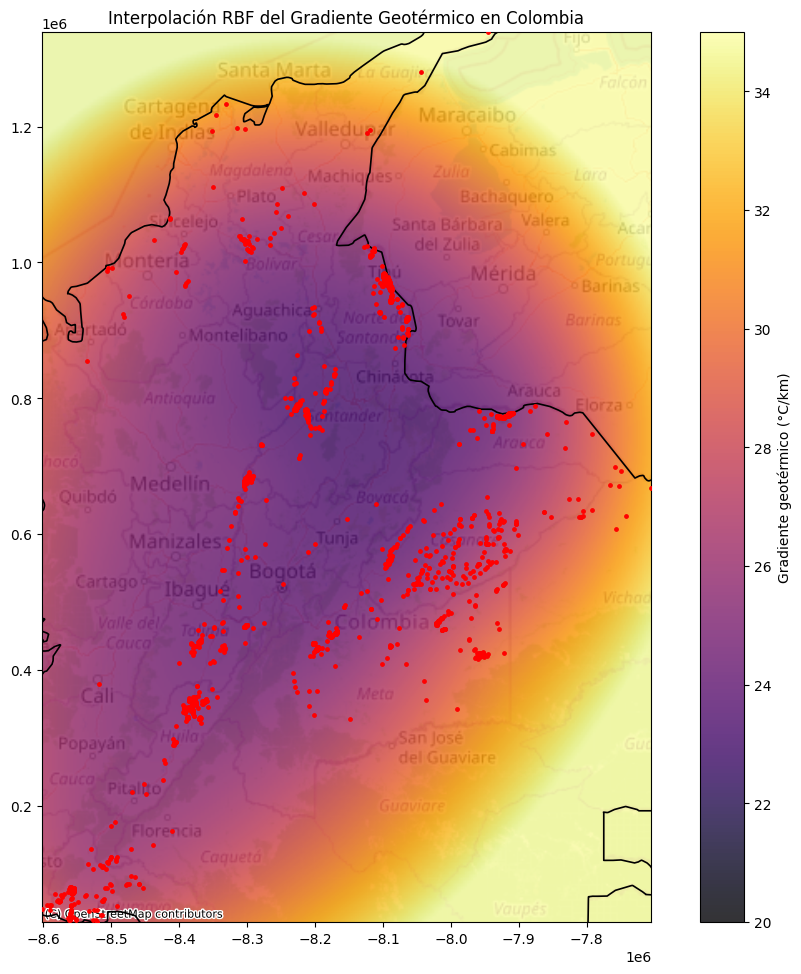

In [94]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf
import contextily as ctx

# === 1. Cargar datos ===
gdf = gpd.read_file("C:/Git_SCA/AGE/Geotermica").to_crs(epsg=3857)
colombia = gpd.read_file("C:/Git_SCA/AGE/Area_col").to_crs(epsg=3857)

# === 2. Filtrar valores válidos ===
gdf = gdf[gdf['GRADIENTE'].notna()]
gdf = gdf[(gdf['GRADIENTE'] >= 20) & (gdf['GRADIENTE'] <= 35)]

# === 3. Extraer coordenadas y valores ===
x = gdf.geometry.x.values
y = gdf.geometry.y.values
z = gdf['GRADIENTE'].values

# === 4. Crear malla regular ===
minx, miny, maxx, maxy = gdf.total_bounds
grid_x, grid_y = np.mgrid[minx:maxx:300j, miny:maxy:300j]

# === 5. Interpolación con RBF ===
rbf = Rbf(x, y, z, function='multiquadric', smooth=1000)
grid_z = rbf(grid_x, grid_y)
grid_z = np.clip(grid_z, 20, 35)  # Clipping a los límites deseados

# === 6. Graficar resultado ===
fig, ax = plt.subplots(figsize=(10, 10))
c = ax.imshow(
    grid_z.T,
    extent=(minx, maxx, miny, maxy),
    origin='lower',
    cmap='inferno',
    alpha=0.8,
    zorder=2,
    vmin=20,
    vmax=35
)

# Mapa base y contornos
ctx.add_basemap(ax, crs='EPSG:3857', source=ctx.providers.OpenStreetMap.Mapnik, zorder=1)
colombia.boundary.plot(ax=ax, color='black', linewidth=1.2, zorder=3)
gdf.plot(ax=ax, markersize=6, color='red', zorder=4)

# Colorbar y título
plt.colorbar(c, ax=ax, label='Gradiente geotérmico (°C/km)')
plt.title("Interpolación RBF del Gradiente Geotérmico en Colombia", fontsize=12)
plt.tight_layout()
plt.show()



=== Reporte de clasificación ===
              precision    recall  f1-score   support

           0       0.71      0.85      0.77       308
           1       0.63      0.42      0.51       186

    accuracy                           0.69       494
   macro avg       0.67      0.64      0.64       494
weighted avg       0.68      0.69      0.67       494


=== Coeficientes del modelo ===
Z         0.048753
azufre    0.000439
edad     -0.007337
grad     -0.352255
dtype: float64


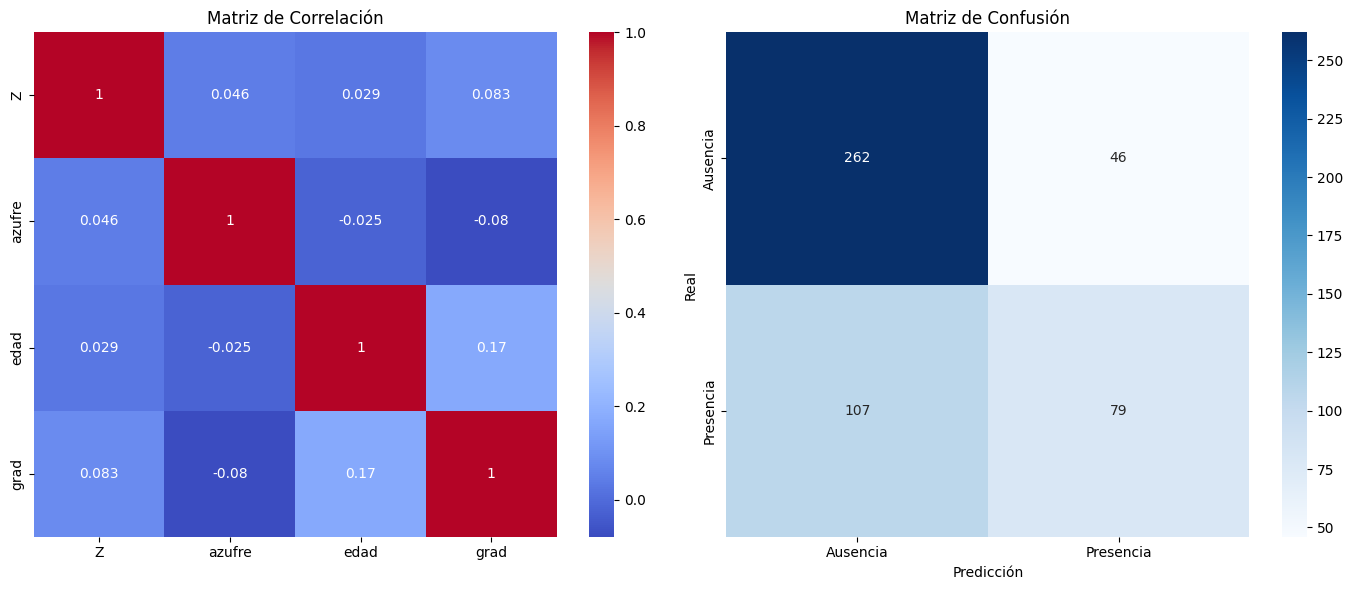

In [95]:
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Point
from shapely.ops import unary_union
from scipy.interpolate import griddata
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Cargar shapefiles ===
gdf_corteza = gpd.read_file("C:/Git_SCA/AGE/Corteza").to_crs(epsg=3857)
gdf_azufre = gpd.read_file("C:/Git_SCA/AGE/azufre").to_crs(epsg=3857)
gdf_dataciones = gpd.read_file("C:/Git_SCA/AGE/Dataciones").to_crs(epsg=3857)
gdf_geotermia = gpd.read_file("C:/Git_SCA/AGE/Geotermica").to_crs(epsg=3857)
gdf_depositos = gpd.read_file("C:/Git_SCA/AGE/Depositos").to_crs(epsg=3857)

# 🔧 Fix temporal para geometrías problemáticas
gdf_colombia = gpd.read_file("C:/Git_SCA/AGE/Area_Col")
gdf_colombia = gdf_colombia[gdf_colombia.is_valid].to_crs(epsg=3857)

# === 2. Preprocesamiento ===
corteza = gdf_corteza.dropna(subset=['Z'])

az = gdf_azufre.dropna(subset=['VALOR_ORIG', 'UNIDAD']).copy()
az['VALOR_ORIG'] = pd.to_numeric(az['VALOR_ORIG'], errors='coerce')
az['azufre_ppm'] = np.where(az['UNIDAD'].str.lower() == 'per', az['VALOR_ORIG'] * 10000, az['VALOR_ORIG'])
az = az[az['azufre_ppm'] <= 1500]

dat = gdf_dataciones.dropna(subset=['EdadMa']).copy()
dat['EdadMa'] = pd.to_numeric(dat['EdadMa'].str.replace(',', '.'), errors='coerce')
dat = dat[dat['EdadMa'] <= 500]

geo = gdf_geotermia.dropna(subset=['GRADIENTE'])
geo = geo[(geo['GRADIENTE'] >= 20) & (geo['GRADIENTE'] <= 29)]

# === 3. Interpolación ===
minx, miny, maxx, maxy = gdf_colombia.total_bounds
grid_x, grid_y = np.mgrid[minx:maxx:500j, miny:maxy:500j]

def interpolar(gdf, col):
    return griddata(
        (gdf.geometry.x, gdf.geometry.y),
        gdf[col],
        (grid_x, grid_y),
        method='linear'
    )

grid_z = interpolar(corteza, 'Z')
grid_azufre = interpolar(az, 'azufre_ppm')
grid_edad = interpolar(dat, 'EdadMa')
grid_grad = interpolar(geo, 'GRADIENTE')

# === 4. Extraer valores en depósitos ===
def extraer(grid, coords):
    xi = ((coords.x - minx) / (maxx - minx) * 499).astype(int)
    yi = ((coords.y - miny) / (maxy - miny) * 499).astype(int)
    return grid[xi, yi]

coords_dep = gdf_depositos.geometry
presencias = pd.DataFrame({
    'Z': extraer(grid_z, coords_dep),
    'azufre': extraer(grid_azufre, coords_dep),
    'edad': extraer(grid_edad, coords_dep),
    'grad': extraer(grid_grad, coords_dep),
    'presencia': 1
}).dropna()

# === 5. Generar pseudo-ausencias ===
area_poly = unary_union(gdf_colombia.geometry)
np.random.seed(42)
puntos = []
while len(puntos) < 3000:
    x, y = np.random.uniform(minx, maxx), np.random.uniform(miny, maxy)
    pt = Point(x, y)
    if area_poly.contains(pt):
        puntos.append(pt)

gdf_pseudo = gpd.GeoDataFrame(geometry=puntos, crs=gdf_colombia.crs)
ausencias = pd.DataFrame({
    'Z': extraer(grid_z, gdf_pseudo.geometry),
    'azufre': extraer(grid_azufre, gdf_pseudo.geometry),
    'edad': extraer(grid_edad, gdf_pseudo.geometry),
    'grad': extraer(grid_grad, gdf_pseudo.geometry),
    'presencia': 0
}).dropna()

# === 6. Regresión logística ===
df = pd.concat([presencias, ausencias])
X = df[['Z', 'azufre', 'edad', 'grad']]
y = df['presencia']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

# === 7. Reporte y gráficos ===
print("\n=== Reporte de clasificación ===")
print(classification_report(y_test, y_pred))

# Coeficientes
coef = pd.Series(modelo.coef_[0], index=X.columns)
print("\n=== Coeficientes del modelo ===")
print(coef)

# Matrices
conf_matrix = confusion_matrix(y_test, y_pred)
correlation_matrix = df[['Z', 'azufre', 'edad', 'grad']].corr()

# === 8. Gráficos ===
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=axs[0])
axs[0].set_title("Matriz de Correlación")

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axs[1],
            xticklabels=['Ausencia', 'Presencia'],
            yticklabels=['Ausencia', 'Presencia'])
axs[1].set_title("Matriz de Confusión")
axs[1].set_xlabel("Predicción")
axs[1].set_ylabel("Real")

plt.tight_layout()
plt.show()


C:\TEMP\ipykernel_5140\3406994212.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_importancia, x='Variable', y='Importancia', palette='viridis')


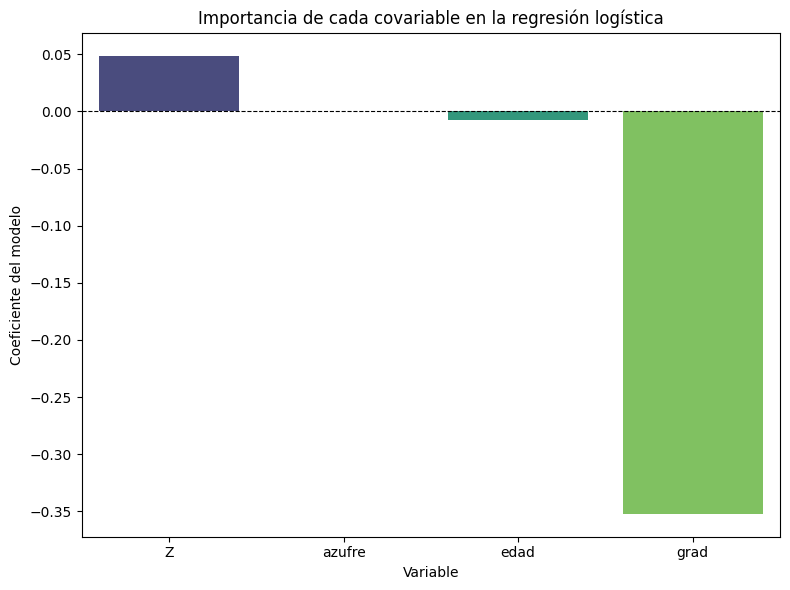

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Suponiendo que X_train contiene las columnas ['Z', 'azufre', 'edad', 'grad']
# Y_train contiene las etiquetas (0 y 1)

# Entrenar modelo si aún no se ha hecho
model = LogisticRegression()
model.fit(X_train, y_train)

# Obtener coeficientes
coeficientes = model.coef_[0]
variables = X_train.columns.tolist()

# Crear DataFrame
df_importancia = pd.DataFrame({
    'Variable': variables,
    'Importancia': coeficientes
})

# Gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(data=df_importancia, x='Variable', y='Importancia', palette='viridis')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.title('Importancia de cada covariable en la regresión logística')
plt.ylabel('Coeficiente del modelo')
plt.xlabel('Variable')
plt.tight_layout()
plt.show()


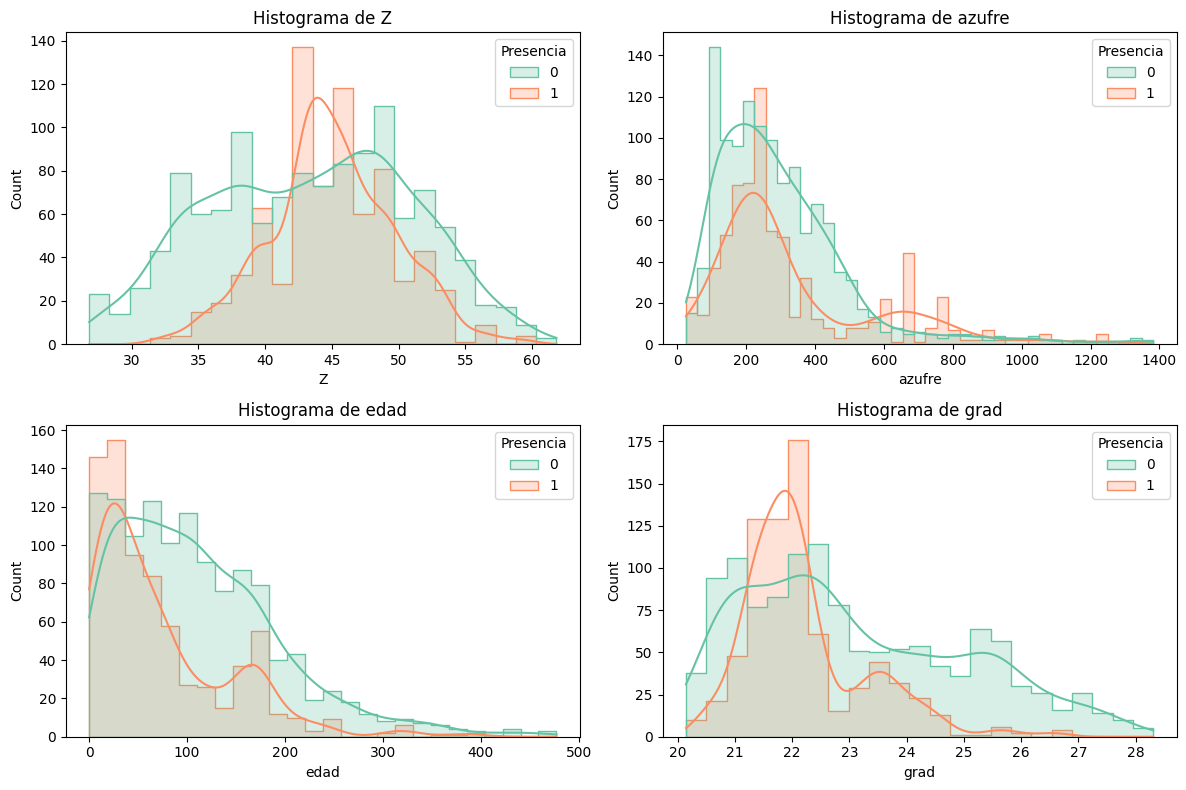

C:\TEMP\ipykernel_5140\154183686.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Presencia', y=var, palette='Set2')
C:\TEMP\ipykernel_5140\154183686.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Presencia', y=var, palette='Set2')
C:\TEMP\ipykernel_5140\154183686.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Presencia', y=var, palette='Set2')
C:\TEMP\ipykernel_5140\154183686.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.

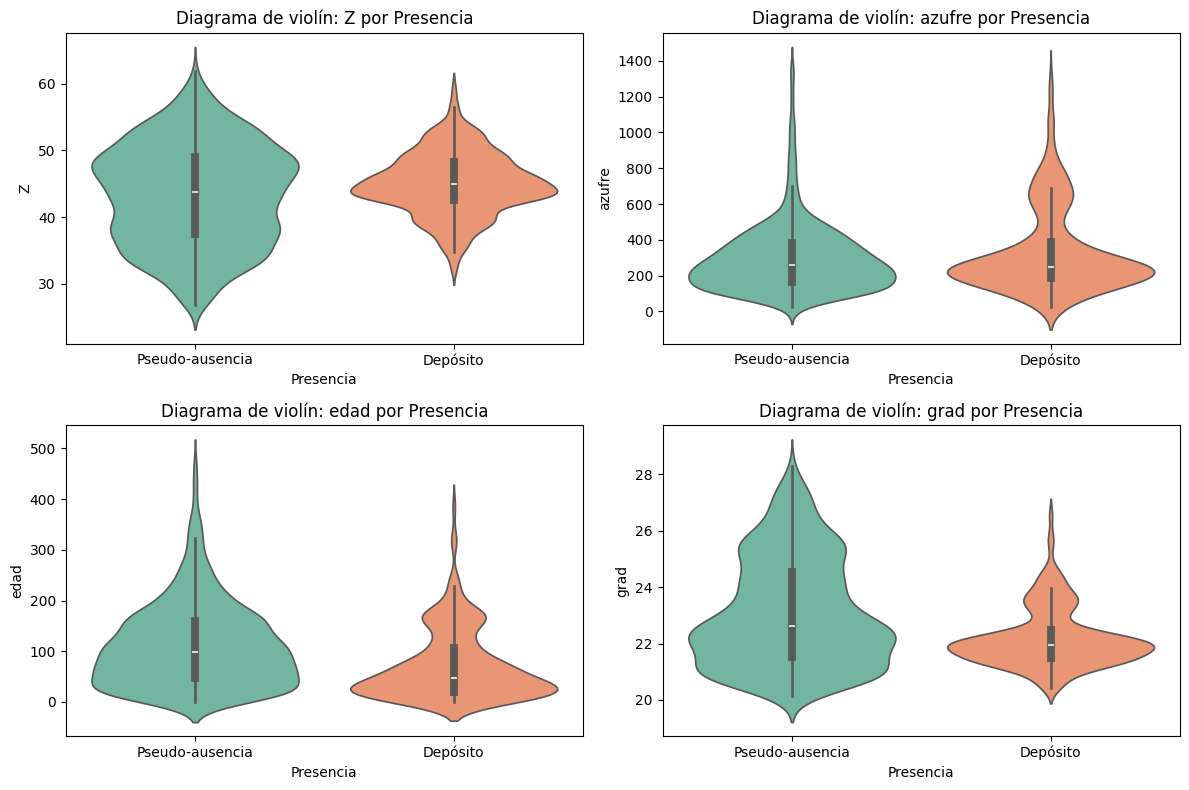

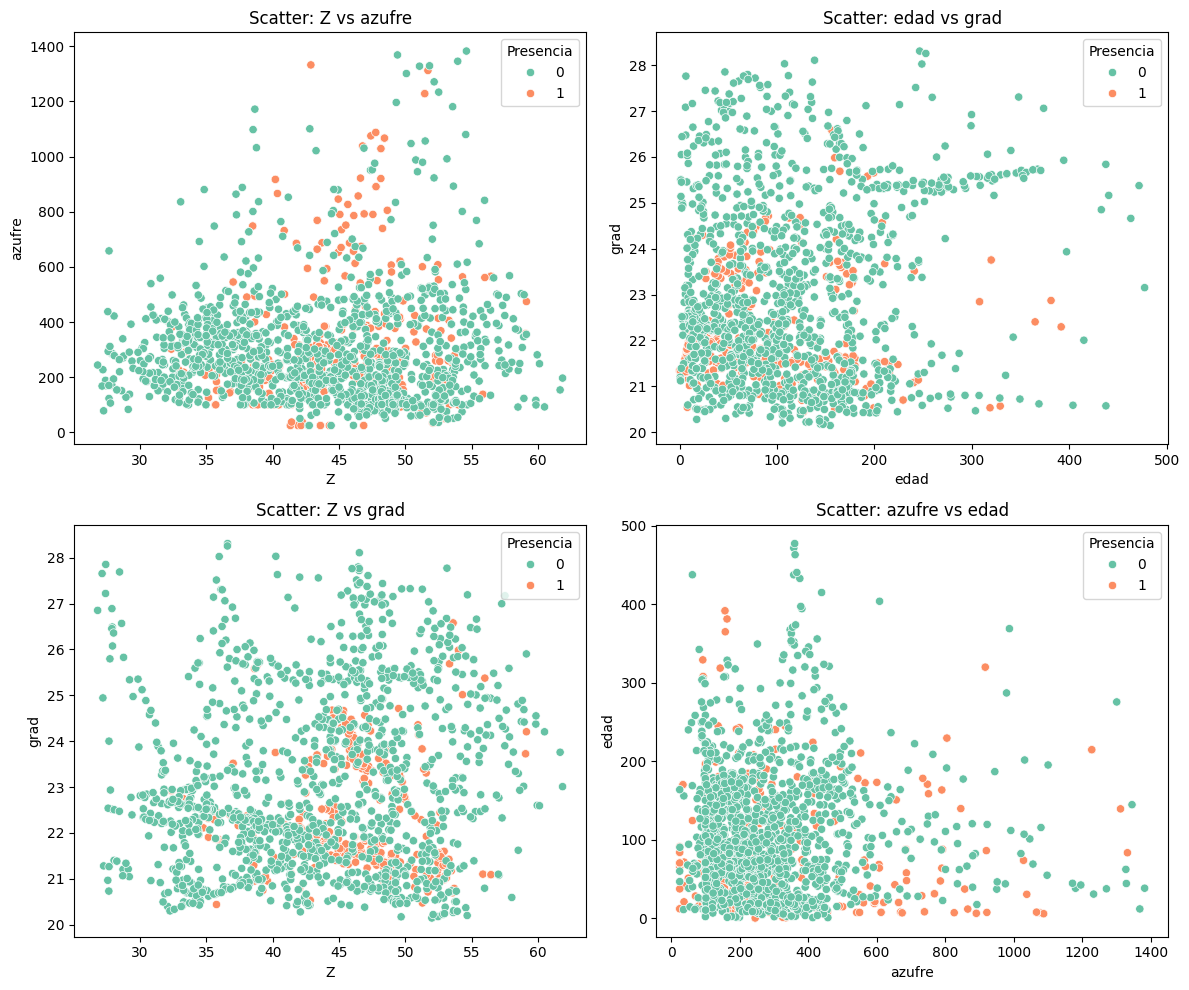

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de tener el DataFrame con las variables
# Si no, combínalo así (solo si ya tienes X y y):
df = X.copy()
df['Presencia'] = y

# Si ya tienes df con las columnas y 'Presencia':
variables = ['Z', 'azufre', 'edad', 'grad']

# ==== 1. HISTOGRAMAS ====
plt.figure(figsize=(12, 8))
for i, var in enumerate(variables):
    plt.subplot(2, 2, i+1)
    sns.histplot(data=df, x=var, hue='Presencia', kde=True, element='step', palette='Set2')
    plt.title(f'Histograma de {var}')
plt.tight_layout()
plt.show()

# ==== 2. VIOLIN PLOTS ====
plt.figure(figsize=(12, 8))
for i, var in enumerate(variables):
    plt.subplot(2, 2, i+1)
    sns.violinplot(data=df, x='Presencia', y=var, palette='Set2')
    plt.title(f'Diagrama de violín: {var} por Presencia')
    plt.xticks([0, 1], ['Pseudo-ausencia', 'Depósito'])
plt.tight_layout()
plt.show()

# ==== 3. SCATTER PLOTS ====
# Para combinaciones de variables
pairs = [('Z', 'azufre'), ('edad', 'grad'), ('Z', 'grad'), ('azufre', 'edad')]
plt.figure(figsize=(12, 10))
for i, (x_var, y_var) in enumerate(pairs):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(data=df, x=x_var, y=y_var, hue='Presencia', palette='Set2')
    plt.title(f'Scatter: {x_var} vs {y_var}')
    plt.legend(title='Presencia')
plt.tight_layout()
plt.show()



=== Reporte de clasificación ===
              precision    recall  f1-score   support

           0       0.71      0.85      0.77       308
           1       0.63      0.42      0.51       186

    accuracy                           0.69       494
   macro avg       0.67      0.64      0.64       494
weighted avg       0.68      0.69      0.67       494


=== Coeficientes normalizados (importancia) ===
Z         0.322938
azufre    0.094210
edad     -0.589030
grad     -0.601166
dtype: float64


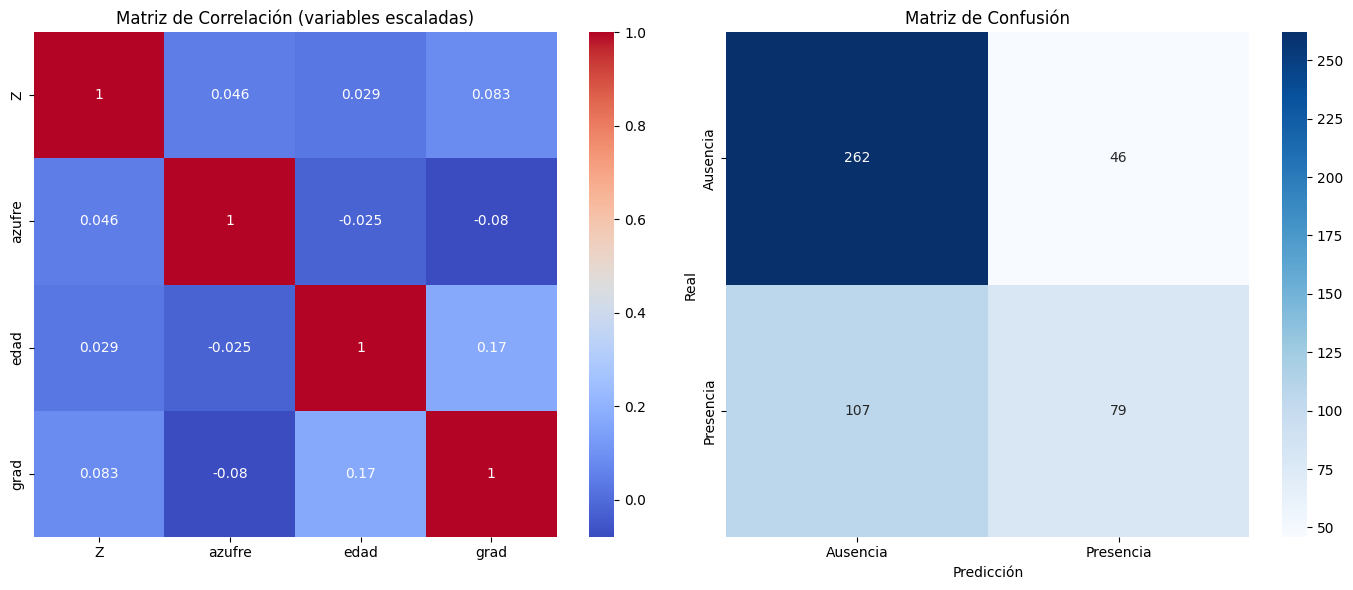

In [98]:
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Point
from shapely.ops import unary_union
from scipy.interpolate import griddata
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Cargar shapefiles ===
gdf_corteza   = gpd.read_file("C:/Git_SCA/AGE/Corteza").to_crs(epsg=3857)
gdf_azufre    = gpd.read_file("C:/Git_SCA/AGE/azufre").to_crs(epsg=3857)
gdf_dataciones= gpd.read_file("C:/Git_SCA/AGE/Dataciones").to_crs(epsg=3857)
gdf_geotermia = gpd.read_file("C:/Git_SCA/AGE/Geotermica").to_crs(epsg=3857)
gdf_depositos = gpd.read_file("C:/Git_SCA/AGE/Depositos").to_crs(epsg=3857)

# 🔧 Solucion temporal para geometrías problemáticas
gdf_colombia = gpd.read_file("C:/Git_SCA/AGE/Area_Col")
gdf_colombia = gdf_colombia[gdf_colombia.is_valid].to_crs(epsg=3857)

# === 2. Preprocesamiento y filtros ===
# Corteza
corteza = gdf_corteza.dropna(subset=['Z'])

# Azufre (normalizar a ppm y filtrar)
az = gdf_azufre.dropna(subset=['VALOR_ORIG','UNIDAD']).copy()
az['VALOR_ORIG'] = pd.to_numeric(az['VALOR_ORIG'], errors='coerce')
az['azufre_ppm'] = np.where(az['UNIDAD'].str.lower()=='per', az['VALOR_ORIG']*10000, az['VALOR_ORIG'])
az = az[az['azufre_ppm']<=1500]

# Dataciones (EdadMa en Ma, filtrar >500)
dat = gdf_dataciones.dropna(subset=['EdadMa']).copy()
dat['EdadMa'] = pd.to_numeric(dat['EdadMa'].str.replace(',','.'), errors='coerce')
dat = dat[dat['EdadMa']<=500]

# Geotermia (GRADIENTE entre 20 y 29)
geo = gdf_geotermia.dropna(subset=['GRADIENTE'])
geo = geo[(geo['GRADIENTE']>=20)&(geo['GRADIENTE']<=29)]

# === 3. Interpolación sobre malla común ===
minx, miny, maxx, maxy = gdf_colombia.total_bounds
grid_x, grid_y = np.mgrid[minx:maxx:500j, miny:maxy:500j]

def interpolar(gdf, col):
    return griddata(
        (gdf.geometry.x, gdf.geometry.y),
        gdf[col],
        (grid_x, grid_y),
        method='linear'
    )

grid_z      = interpolar(corteza, 'Z')
grid_azufre = interpolar(az, 'azufre_ppm')
grid_edad   = interpolar(dat, 'EdadMa')
grid_grad   = interpolar(geo, 'GRADIENTE')

# === 4. Extraer valores en puntos de depósitos (presencias) ===
def extraer(grid, coords):
    xi = ((coords.x-minx)/(maxx-minx)*499).astype(int)
    yi = ((coords.y-miny)/(maxy-miny)*499).astype(int)
    return grid[xi, yi]

coords_dep = gdf_depositos.geometry
presencias = pd.DataFrame({
    'Z':      extraer(grid_z, coords_dep),
    'azufre': extraer(grid_azufre, coords_dep),
    'edad':   extraer(grid_edad, coords_dep),
    'grad':   extraer(grid_grad, coords_dep),
    'presencia': 1
}).dropna()

# === 5. Generar pseudo-ausencias ===
area_poly = unary_union(gdf_colombia.geometry)
np.random.seed(42)
puntos=[]
while len(puntos)<3000:
    x_rand, y_rand = np.random.uniform(minx,maxx), np.random.uniform(miny,maxy)
    p=Point(x_rand,y_rand)
    if area_poly.contains(p):
        puntos.append(p)

gdf_pseudo = gpd.GeoDataFrame(geometry=puntos, crs=gdf_colombia.crs)
ausencias = pd.DataFrame({
    'Z':      extraer(grid_z, gdf_pseudo.geometry),
    'azufre': extraer(grid_azufre, gdf_pseudo.geometry),
    'edad':   extraer(grid_edad, gdf_pseudo.geometry),
    'grad':   extraer(grid_grad, gdf_pseudo.geometry),
    'presencia': 0
}).dropna()

# === 6. Crear matriz de datos y normalizar variables ===
df = pd.concat([presencias, ausencias]).reset_index(drop=True)
X = df[['Z','azufre','edad','grad']]
y = df['presencia']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === 7. Entrenar y evaluar modelo ===
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# === 8. Reporte, coeficientes y matrices ===
print("\n=== Reporte de clasificación ===")
print(classification_report(y_test, y_pred))

coef = pd.Series(model.coef_[0], index=X.columns)
print("\n=== Coeficientes normalizados (importancia) ===")
print(coef)

conf_matrix = confusion_matrix(y_test, y_pred)
corr_matrix = pd.DataFrame(X_scaled, columns=X.columns).corr()

# === 9. Graficar matrices ===
fig, ax = plt.subplots(1,2,figsize=(14,6))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax[0])
ax[0].set_title("Matriz de Correlación (variables escaladas)")

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ausencia','Presencia'],
            yticklabels=['Ausencia','Presencia'], ax=ax[1])
ax[1].set_title("Matriz de Confusión")
ax[1].set_xlabel("Predicción")
ax[1].set_ylabel("Real")

plt.tight_layout()
plt.show()


C:\TEMP\ipykernel_5140\3178599734.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Variable', data=df_importancia, palette='viridis')


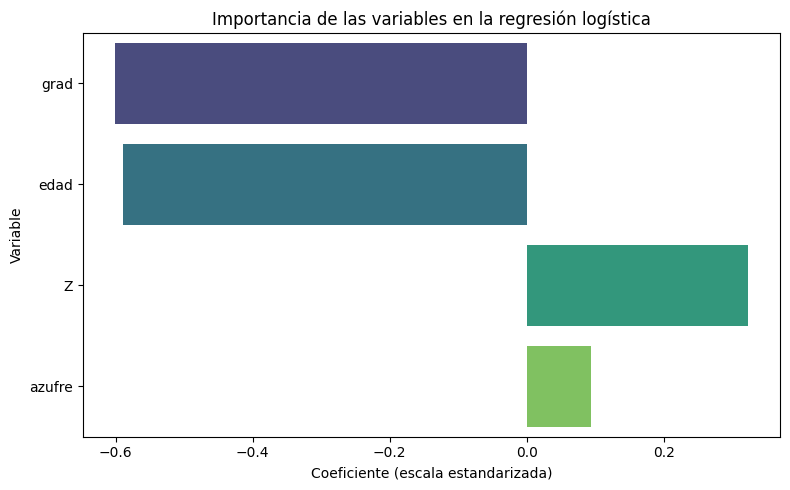

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Obtener coeficientes y nombres de variables
coeficientes = model.coef_[0]
variables = X.columns.tolist()  # Usa los nombres originales

# Crear DataFrame con coeficientes
df_importancia = pd.DataFrame({
    'Variable': variables,
    'Importancia': coeficientes
}).sort_values(by='Importancia', key=abs, ascending=False)

# Graficar
plt.figure(figsize=(8, 5))
sns.barplot(x='Importancia', y='Variable', data=df_importancia, palette='viridis')
plt.title('Importancia de las variables en la regresión logística')
plt.xlabel('Coeficiente (escala estandarizada)')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()


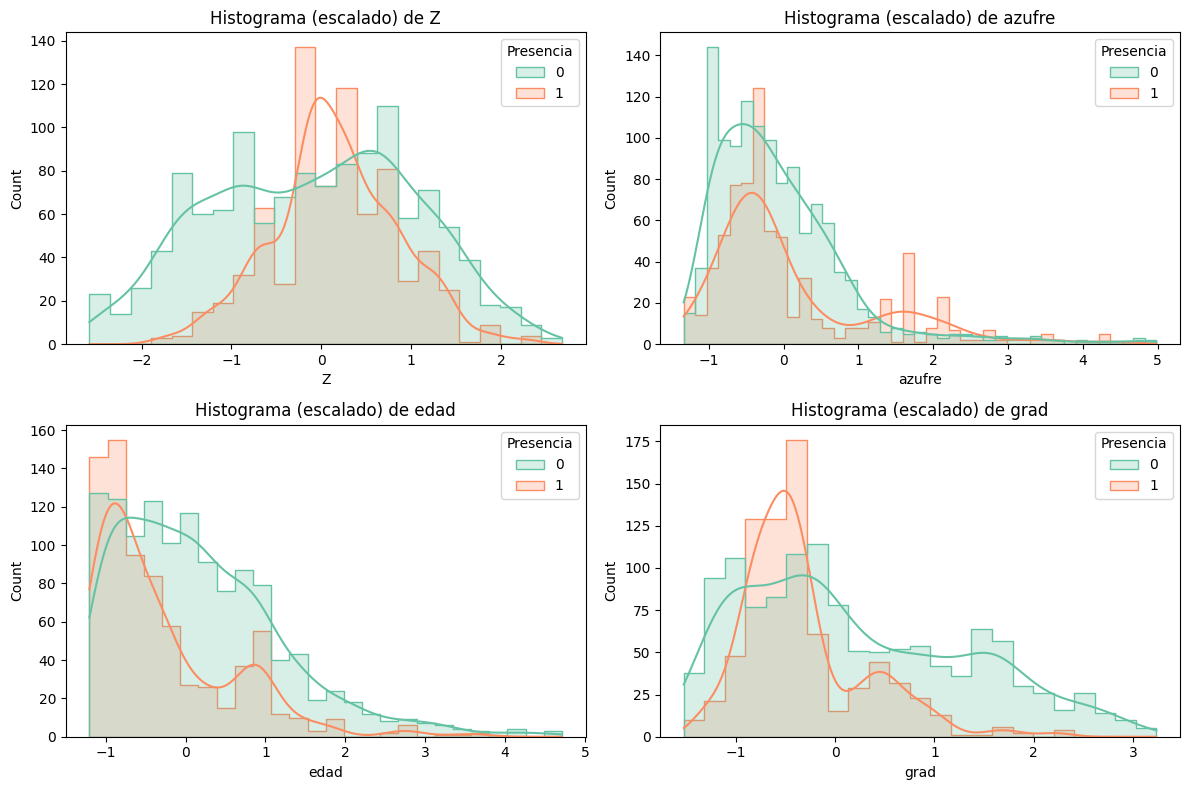

C:\TEMP\ipykernel_5140\4213991408.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_scaled, x='Presencia', y=var, palette='Set2')
C:\TEMP\ipykernel_5140\4213991408.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_scaled, x='Presencia', y=var, palette='Set2')
C:\TEMP\ipykernel_5140\4213991408.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_scaled, x='Presencia', y=var, palette='Set2')
C:\TEMP\ipykernel_5140\4213991408.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

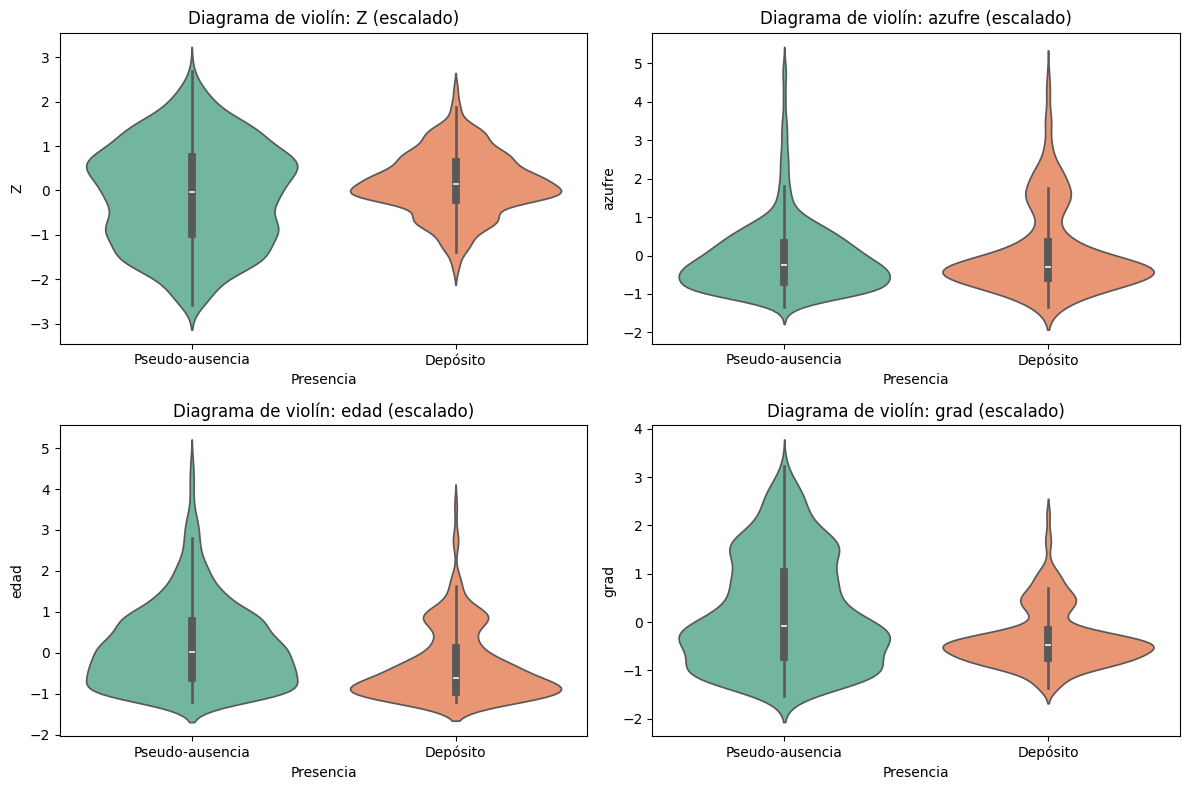

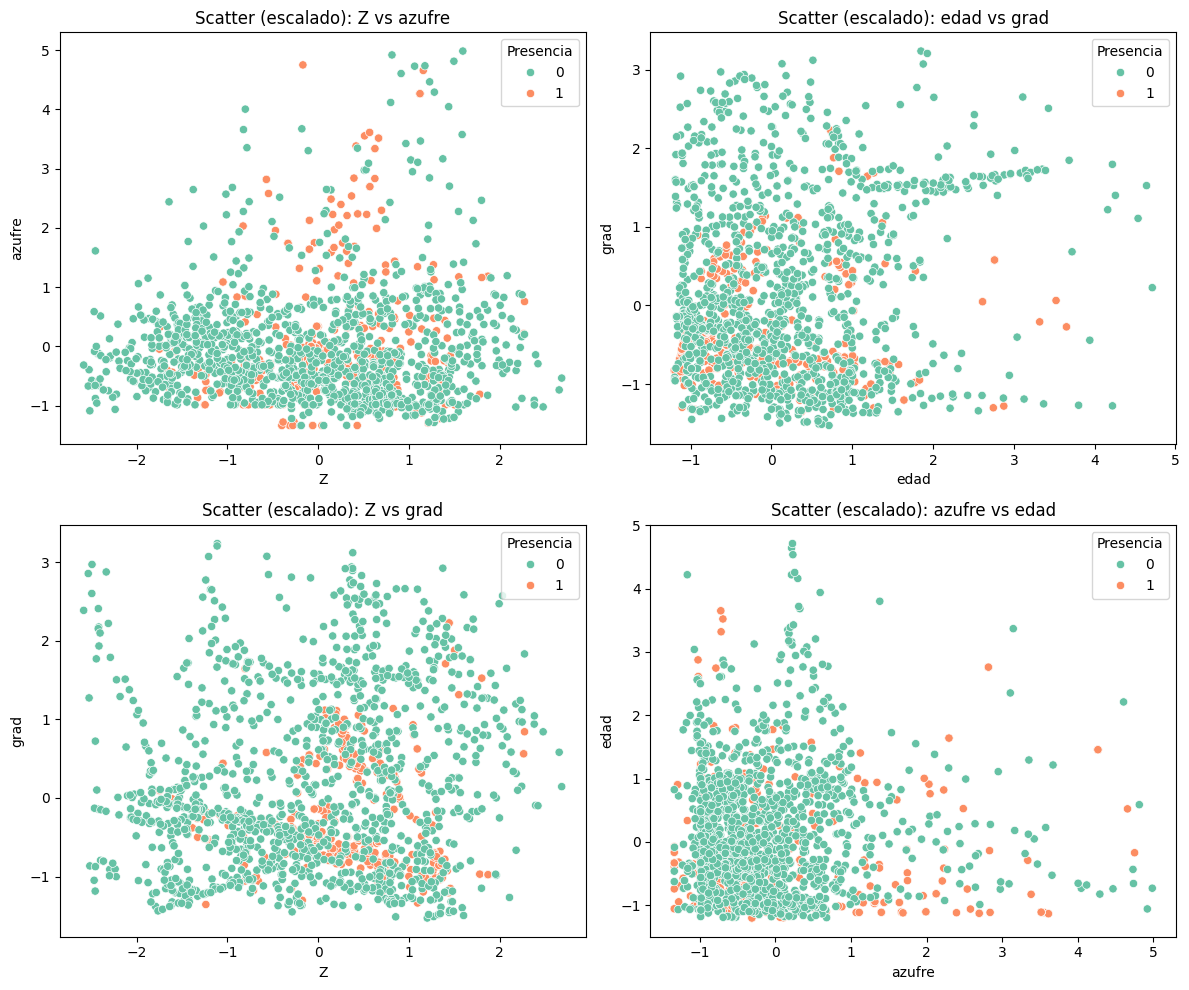

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Crear DataFrame combinado
df = X.copy()
df['Presencia'] = y

# Variables a normalizar
variables = ['Z', 'azufre', 'edad', 'grad']

# Aplicar escalado estándar
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[variables] = scaler.fit_transform(df[variables])

# ==== 1. HISTOGRAMAS ====
plt.figure(figsize=(12, 8))
for i, var in enumerate(variables):
    plt.subplot(2, 2, i+1)
    sns.histplot(data=df_scaled, x=var, hue='Presencia', kde=True, element='step', palette='Set2')
    plt.title(f'Histograma (escalado) de {var}')
plt.tight_layout()
plt.show()

# ==== 2. VIOLIN PLOTS ====
plt.figure(figsize=(12, 8))
for i, var in enumerate(variables):
    plt.subplot(2, 2, i+1)
    sns.violinplot(data=df_scaled, x='Presencia', y=var, palette='Set2')
    plt.title(f'Diagrama de violín: {var} (escalado)')
    plt.xticks([0, 1], ['Pseudo-ausencia', 'Depósito'])
plt.tight_layout()
plt.show()

# ==== 3. SCATTER PLOTS ====
pairs = [('Z', 'azufre'), ('edad', 'grad'), ('Z', 'grad'), ('azufre', 'edad')]
plt.figure(figsize=(12, 10))
for i, (x_var, y_var) in enumerate(pairs):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(data=df_scaled, x=x_var, y=y_var, hue='Presencia', palette='Set2')
    plt.title(f'Scatter (escalado): {x_var} vs {y_var}')
    plt.legend(title='Presencia')
plt.tight_layout()
plt.show()


C:\TEMP\ipykernel_5140\152614765.py:99: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(gdf)


REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :   Presencia                Number of Observations:        1975
Mean dependent var  :      0.3767                Number of Variables   :           6
S.D. dependent var  :      0.4847                Degrees of Freedom    :        1969
Pseudo R-squared    :      0.1264
Spatial Pseudo R-squared:  0.1264
Log likelihood      :  -1238.0509
Sigma-square ML     :      0.2051                Akaike info criterion :    2488.102
S.E of regression   :      0.4529                Schwarz criterion     :    2521.632

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
---------------------------------------------------------------

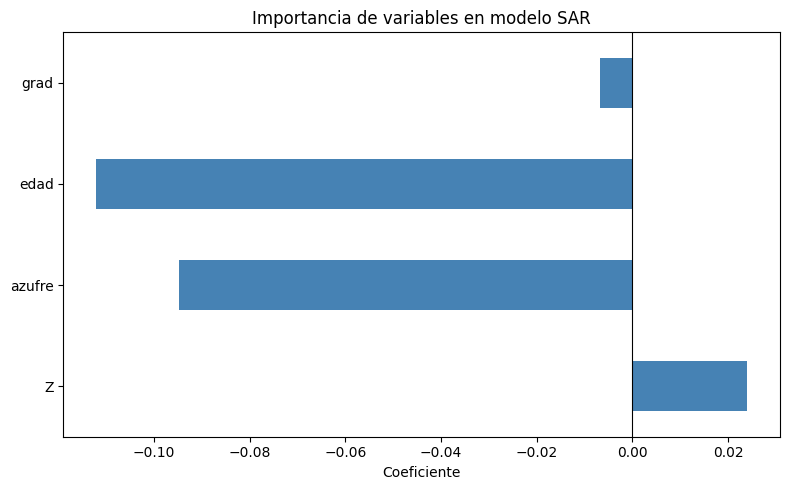

In [101]:
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Point
from shapely.ops import unary_union
from scipy.interpolate import griddata
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from libpysal.weights import Queen
from spreg import ML_Lag

# === 1. Cargar shapefiles ===
gdf_corteza    = gpd.read_file("C:/Git_SCA/AGE/Corteza").to_crs(epsg=3857)
gdf_azufre     = gpd.read_file("C:/Git_SCA/AGE/azufre").to_crs(epsg=3857)
gdf_dataciones = gpd.read_file("C:/Git_SCA/AGE/Dataciones").to_crs(epsg=3857)
gdf_geotermia  = gpd.read_file("C:/Git_SCA/AGE/Geotermica").to_crs(epsg=3857)
gdf_depositos  = gpd.read_file("C:/Git_SCA/AGE/Depositos").to_crs(epsg=3857)
gdf_colombia   = gpd.read_file("C:/Git_SCA/AGE/Area_Col")
gdf_colombia   = gdf_colombia[gdf_colombia.is_valid].to_crs(epsg=3857)

# === 2. Preprocesamiento ===
corteza = gdf_corteza.dropna(subset=['Z'])

az = gdf_azufre.dropna(subset=['VALOR_ORIG', 'UNIDAD']).copy()
az['VALOR_ORIG'] = pd.to_numeric(az['VALOR_ORIG'], errors='coerce')
az['azufre_ppm'] = np.where(az['UNIDAD'].str.lower() == 'per', az['VALOR_ORIG'] * 10000, az['VALOR_ORIG'])
az = az[az['azufre_ppm'] <= 1500]

dat = gdf_dataciones.dropna(subset=['EdadMa']).copy()
dat['EdadMa'] = pd.to_numeric(dat['EdadMa'].str.replace(',', '.'), errors='coerce')
dat = dat[dat['EdadMa'] <= 500]

geo = gdf_geotermia.dropna(subset=['GRADIENTE'])
geo = geo[(geo['GRADIENTE'] >= 20) & (geo['GRADIENTE'] <= 29)]

# === 3. Interpolación sobre malla ===
minx, miny, maxx, maxy = gdf_colombia.total_bounds
grid_x, grid_y = np.mgrid[minx:maxx:500j, miny:maxy:500j]

def interpolar(gdf, col):
    return griddata(
        (gdf.geometry.x, gdf.geometry.y),
        gdf[col],
        (grid_x, grid_y),
        method='linear'
    )

grid_z      = interpolar(corteza, 'Z')
grid_azufre = interpolar(az, 'azufre_ppm')
grid_edad   = interpolar(dat, 'EdadMa')
grid_grad   = interpolar(geo, 'GRADIENTE')

def extraer(grid, coords):
    xi = ((coords.x - minx) / (maxx - minx) * 499).astype(int)
    yi = ((coords.y - miny) / (maxy - miny) * 499).astype(int)
    return grid[xi, yi]

# === 4. Puntos reales (presencias)
coords_dep = gdf_depositos.geometry
presencias = pd.DataFrame({
    'Z':      extraer(grid_z, coords_dep),
    'azufre': extraer(grid_azufre, coords_dep),
    'edad':   extraer(grid_edad, coords_dep),
    'grad':   extraer(grid_grad, coords_dep),
    'presencia': 1
}).dropna()

# === 5. Pseudo-ausencias ===
area_poly = unary_union(gdf_colombia.geometry)
np.random.seed(42)
puntos = []
while len(puntos) < 3000:
    x_rand, y_rand = np.random.uniform(minx, maxx), np.random.uniform(miny, maxy)
    p = Point(x_rand, y_rand)
    if area_poly.contains(p):
        puntos.append(p)

gdf_pseudo = gpd.GeoDataFrame(geometry=puntos, crs=gdf_colombia.crs)
ausencias = pd.DataFrame({
    'Z':      extraer(grid_z, gdf_pseudo.geometry),
    'azufre': extraer(grid_azufre, gdf_pseudo.geometry),
    'edad':   extraer(grid_edad, gdf_pseudo.geometry),
    'grad':   extraer(grid_grad, gdf_pseudo.geometry),
    'presencia': 0
}).dropna()

# === 6. Datos combinados y normalizados ===
df = pd.concat([presencias, ausencias]).reset_index(drop=True)
gdf = gpd.GeoDataFrame(df, geometry=gpd.GeoSeries(puntos + list(coords_dep)), crs=gdf_colombia.crs)

X = df[['Z', 'azufre', 'edad', 'grad']]
y = df['presencia']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === 7. Crear pesos espaciales ===
w = Queen.from_dataframe(gdf)
w.transform = 'r'  # normalizar filas

# === 8. Modelo SAR ===
model_sar = ML_Lag(y.values.reshape(-1, 1), X_scaled, w=w, name_y='Presencia', name_x=['Z', 'azufre', 'edad', 'grad'])

# === 9. Coeficientes e importancia ===
print(model_sar.summary)
print("Intercepto:", model_sar.betas[0, 0])
print("Coeficiente espacial (rho):", model_sar.betas[1, 0])

# Visualización de importancia
importances = pd.Series(model_sar.betas[2:, 0], index=['Z', 'azufre', 'edad', 'grad'])
plt.figure(figsize=(8, 5))
importances.plot(kind='barh', color='steelblue')
plt.axvline(0, color='black', linewidth=0.8)
plt.title('Importancia de variables en modelo SAR')
plt.xlabel('Coeficiente')
plt.tight_layout()
plt.show()


C:\TEMP\ipykernel_16264\2619400681.py:100: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(gdf_all)


REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :   Presencia                Number of Observations:        1975
Mean dependent var  :      0.3767                Number of Variables   :           6
S.D. dependent var  :      0.4847                Degrees of Freedom    :        1969
Pseudo R-squared    :      0.7033
Spatial Pseudo R-squared:  0.3197
Log likelihood      :   -370.0160
Sigma-square ML     :      0.0720                Akaike info criterion :     752.032
S.E of regression   :      0.2684                Schwarz criterion     :     785.562

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
---------------------------------------------------------------

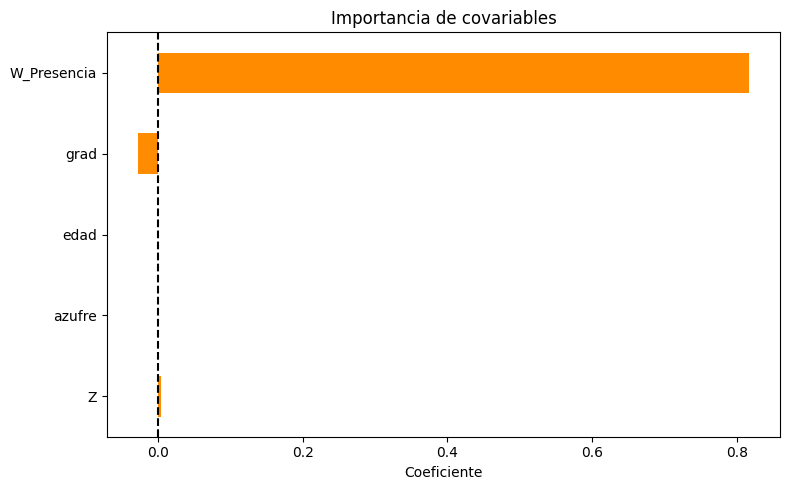

In [7]:
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Point
from shapely.ops import unary_union
from scipy.interpolate import griddata
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from libpysal.weights import Queen
from spreg import ML_Lag

# === 1. Cargar shapefiles ===
gdf_corteza    = gpd.read_file("C:/Git_SCA/AGE/Corteza").to_crs(epsg=3857)
gdf_azufre     = gpd.read_file("C:/Git_SCA/AGE/azufre").to_crs(epsg=3857)
gdf_dataciones = gpd.read_file("C:/Git_SCA/AGE/Dataciones").to_crs(epsg=3857)
gdf_geotermia  = gpd.read_file("C:/Git_SCA/AGE/Geotermica").to_crs(epsg=3857)
gdf_depositos  = gpd.read_file("C:/Git_SCA/AGE/Depositos").to_crs(epsg=3857)
gdf_colombia   = gpd.read_file("C:/Git_SCA/AGE/Area_Col")
gdf_colombia   = gdf_colombia[gdf_colombia.is_valid].to_crs(epsg=3857)

# === 2. Preprocesamiento y filtros ===
corteza = gdf_corteza.dropna(subset=['Z'])

az = gdf_azufre.dropna(subset=['VALOR_ORIG','UNIDAD']).copy()
az['VALOR_ORIG'] = pd.to_numeric(az['VALOR_ORIG'], errors='coerce')
az['azufre_ppm'] = np.where(az['UNIDAD'].str.lower()=='per',
                            az['VALOR_ORIG']*10000,
                            az['VALOR_ORIG'])
az = az[az['azufre_ppm']<=1500]

dat = gdf_dataciones.dropna(subset=['EdadMa']).copy()
dat['EdadMa'] = pd.to_numeric(dat['EdadMa'].str.replace(',','.'), errors='coerce')
dat = dat[dat['EdadMa']<=500]

geo = gdf_geotermia.dropna(subset=['GRADIENTE'])
geo = geo[(geo['GRADIENTE']>=20)&(geo['GRADIENTE']<=29)]

# === 3. Interpolación sobre malla común ===
minx, miny, maxx, maxy = gdf_colombia.total_bounds
grid_x, grid_y = np.mgrid[minx:maxx:500j, miny:maxy:500j]

def interpolar(gdf, col):
    return griddata(
        (gdf.geometry.x, gdf.geometry.y),
        gdf[col],
        (grid_x, grid_y),
        method='linear'
    )

grid_z      = interpolar(corteza, 'Z')
grid_azufre = interpolar(az,     'azufre_ppm')
grid_edad   = interpolar(dat,    'EdadMa')
grid_grad   = interpolar(geo,    'GRADIENTE')

def extraer(grid, coords):
    xi = ((coords.x - minx)/(maxx - minx)*499).astype(int)
    yi = ((coords.y - miny)/(maxy - miny)*499).astype(int)
    return grid[xi, yi]

# === 4. Presencias ===
coords_dep = gdf_depositos.geometry
presencias = pd.DataFrame({
    'Z':       extraer(grid_z,      coords_dep),
    'azufre':  extraer(grid_azufre, coords_dep),
    'edad':    extraer(grid_edad,   coords_dep),
    'grad':    extraer(grid_grad,   coords_dep),
    'presencia': 1
}).dropna()

# === 5. Pseudo-ausencias ===
area_poly = unary_union(gdf_colombia.geometry)
np.random.seed(42)
puntos = []
while len(puntos) < 3000:
    x_rand, y_rand = np.random.uniform(minx,maxx), np.random.uniform(miny,maxy)
    p = Point(x_rand, y_rand)
    if area_poly.contains(p):
        puntos.append(p)

gdf_pseudo = gpd.GeoDataFrame(geometry=puntos, crs=gdf_colombia.crs)
ausencias = pd.DataFrame({
    'Z':       extraer(grid_z,      gdf_pseudo.geometry),
    'azufre':  extraer(grid_azufre, gdf_pseudo.geometry),
    'edad':    extraer(grid_edad,   gdf_pseudo.geometry),
    'grad':    extraer(grid_grad,   gdf_pseudo.geometry),
    'presencia': 0
}).dropna()

# === 6. Datos combinados (sin normalizar) ===
df = pd.concat([presencias, ausencias]).reset_index(drop=True)
# Reusar coordenadas para GeoDataFrame
all_geoms = list(coords_dep) + puntos[:len(df)-len(coords_dep)]
gdf_all = gpd.GeoDataFrame(df, geometry=all_geoms, crs=gdf_colombia.crs)

X = df[['Z','azufre','edad','grad']]
y = df['presencia'].values.reshape(-1,1)

# === 7. Matriz de pesos espaciales ===
w = Queen.from_dataframe(gdf_all)
w.transform = 'r'

# === 8. Ajuste del modelo SAR (ML_Lag) ===
model_sar = ML_Lag(y, X.values, w=w,
                   name_y='Presencia',
                   name_x=['Z','azufre','edad','grad'])

# === 9. Resultados y diagnóstico ===
print(model_sar.summary)
print("Intercepto:", model_sar.betas[0,0])
print("Rho (coef. espacial):", model_sar.rho)

# === 10. Importancia de covariables ===
# betas[1:] omite el intercepto; name_x[1:] omite el nombre del intercepto
importances = pd.Series(model_sar.betas[1:,0],
                        index=model_sar.name_x[1:])

plt.figure(figsize=(8,5))
importances.plot(kind='barh', color='darkorange')
plt.axvline(0, color='black', linestyle='--')
plt.title('Importancia de covariables')
plt.xlabel('Coeficiente')
plt.tight_layout()
plt.show()


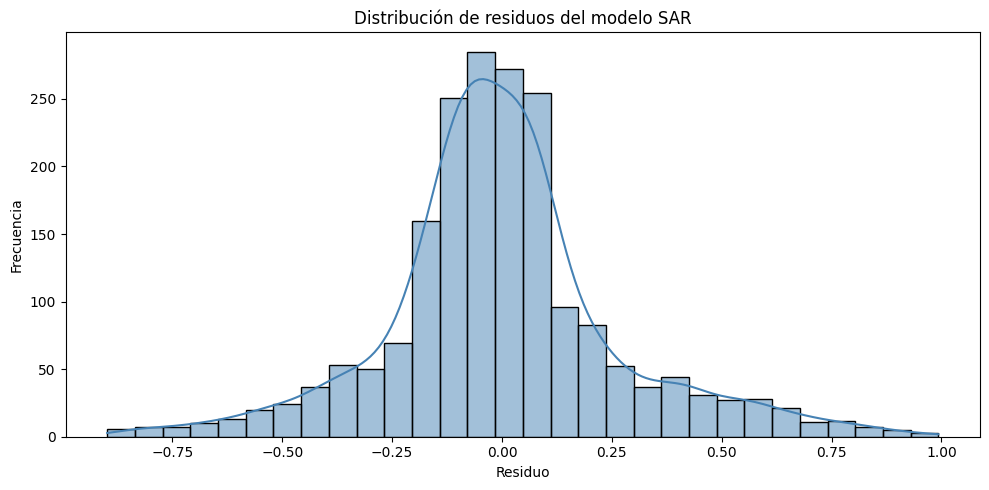

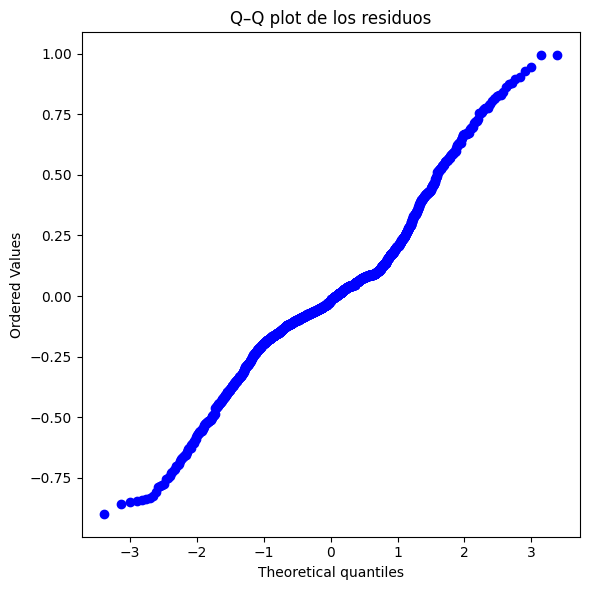

Moran's I de los residuos: -0.0658 (p-valor 0.0010)


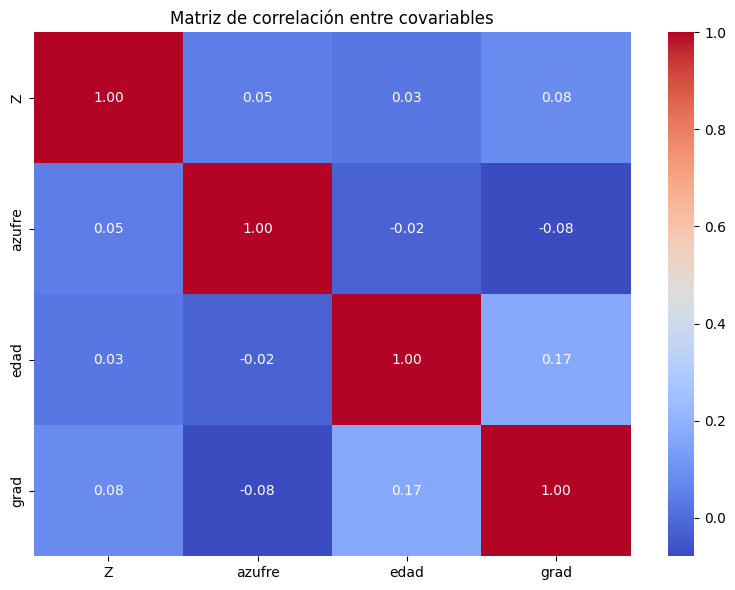

<Figure size 600x600 with 0 Axes>

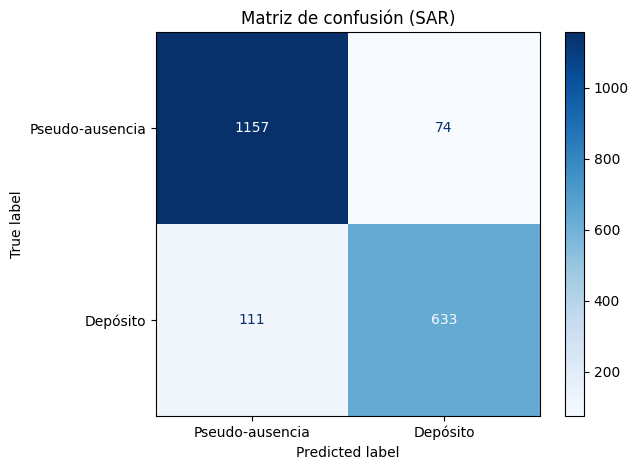

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from esda.moran import Moran

# === Extraer residuos del modelo SAR ===
residuos = model_sar.u.flatten()  # vectorizar

# === 1. Histograma con KDE ===
plt.figure(figsize=(10, 5))
sns.histplot(residuos, bins=30, kde=True, color='steelblue')
plt.title('Distribución de residuos del modelo SAR')
plt.xlabel('Residuo')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# === 2. Q–Q Plot (solo si hay más de un valor) ===
if len(np.unique(residuos)) > 1:
    plt.figure(figsize=(6, 6))
    # fit=False evita el error de regresión lineal cuando x es constante
    stats.probplot(residuos, dist="norm", plot=plt, fit=False)
    plt.title('Q–Q plot de los residuos')
    plt.tight_layout()
    plt.show()
else:
    print("Todos los residuos son idénticos: no se puede dibujar Q–Q plot.")

# === 3. Moran's I sobre residuos ===
# (para evaluar autocorrelación espacial no explicada)
mi = Moran(residuos, w)
print(f"Moran's I de los residuos: {mi.I:.4f} (p-valor {mi.p_sim:.4f})")
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# === 4. Matriz de correlación entre variables ===
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Z', 'azufre', 'edad', 'grad']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación entre covariables')
plt.tight_layout()
plt.show()

# === 5. Matriz de confusión ===
# Obtener predicciones del modelo SAR
y_true = y.flatten()
y_pred = (model_sar.predy.flatten() > 0.5).astype(int)  # Umbral en 0.5

# Crear y mostrar matriz de confusión
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Pseudo-ausencia', 'Depósito'])

plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de confusión (SAR)')
plt.tight_layout()
plt.show()


C:\TEMP\ipykernel_5140\3230009057.py:98: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(gdf_all)
c:\Git_SCA\AGE\.venv\Lib\site-packages\spreg\ml_error.py:184: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  res = minimize_scalar(


REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ML SPATIAL ERROR (METHOD = full)
---------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :   Presencia                Number of Observations:        1975
Mean dependent var  :      0.3767                Number of Variables   :           5
S.D. dependent var  :      0.4847                Degrees of Freedom    :        1970
Pseudo R-squared    :      0.1259
Log likelihood      :   -400.7492
Sigma-square ML     :      0.0733                Akaike info criterion :     811.498
S.E of regression   :      0.2707                Schwarz criterion     :     839.440

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT         0.75852    

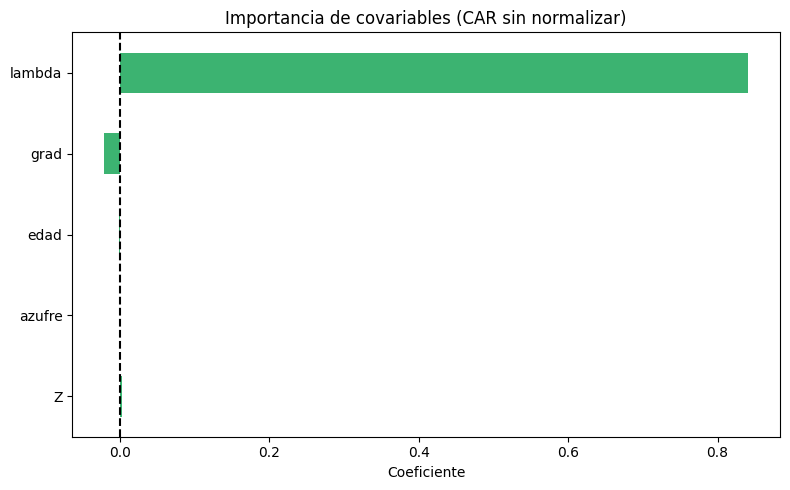

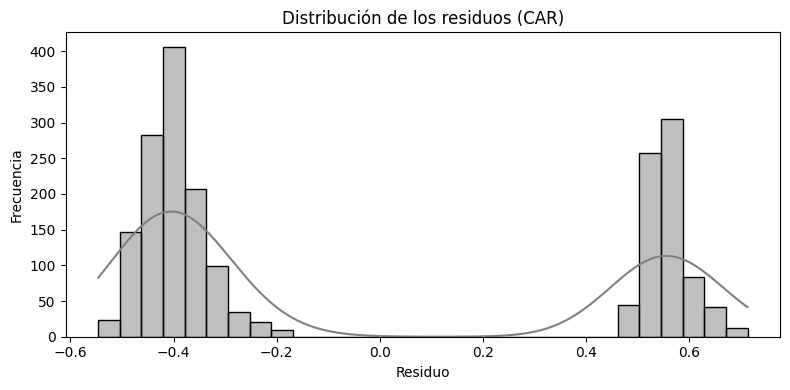

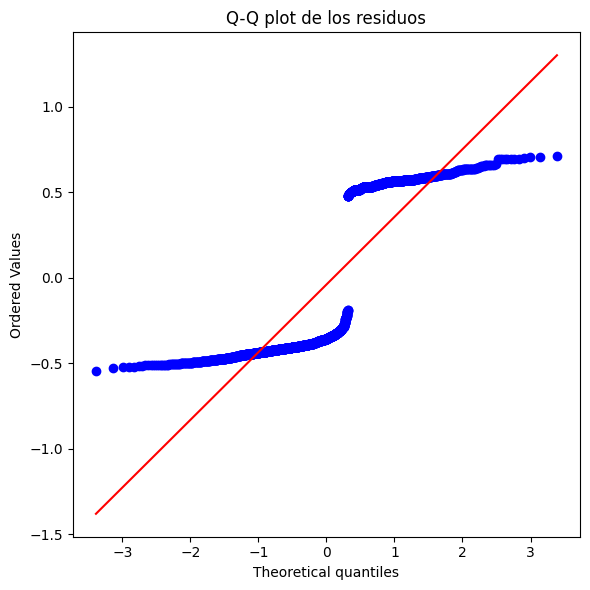

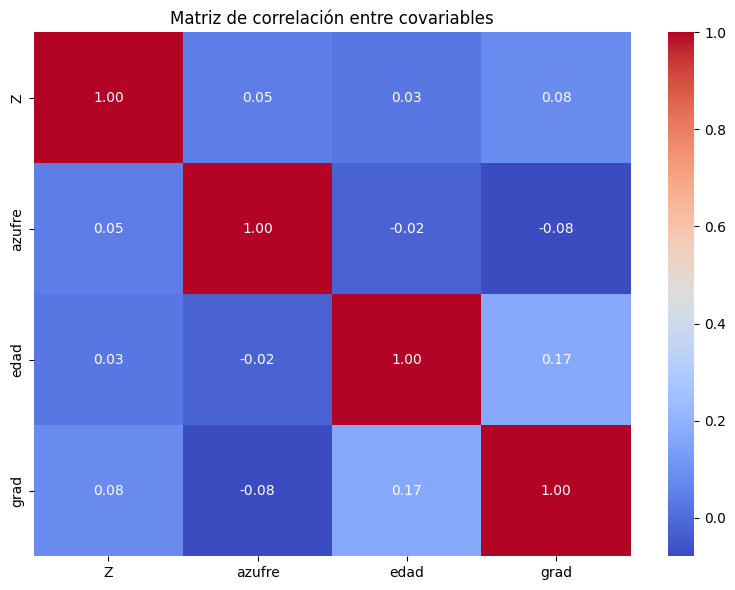

<Figure size 600x600 with 0 Axes>

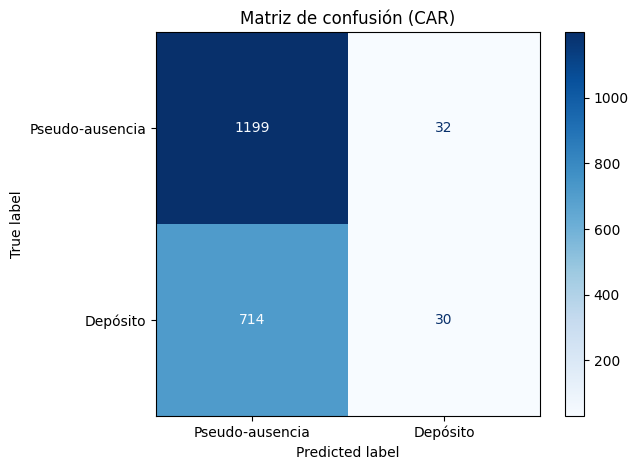

In [104]:
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Point
from shapely.ops import unary_union
from scipy.interpolate import griddata
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from libpysal.weights import Queen
from spreg import ML_Error
from scipy import stats

# === 1. Cargar shapefiles ===
gdf_corteza    = gpd.read_file("C:/Git_SCA/AGE/Corteza").to_crs(epsg=3857)
gdf_azufre     = gpd.read_file("C:/Git_SCA/AGE/azufre").to_crs(epsg=3857)
gdf_dataciones = gpd.read_file("C:/Git_SCA/AGE/Dataciones").to_crs(epsg=3857)
gdf_geotermia  = gpd.read_file("C:/Git_SCA/AGE/Geotermica").to_crs(epsg=3857)
gdf_depositos  = gpd.read_file("C:/Git_SCA/AGE/Depositos").to_crs(epsg=3857)
gdf_colombia   = gpd.read_file("C:/Git_SCA/AGE/Area_Col").to_crs(epsg=3857)
gdf_colombia   = gdf_colombia[gdf_colombia.is_valid]

# === 2. Preprocesamiento ===
corteza = gdf_corteza.dropna(subset=['Z'])

az = gdf_azufre.dropna(subset=['VALOR_ORIG','UNIDAD']).copy()
az['VALOR_ORIG'] = pd.to_numeric(az['VALOR_ORIG'], errors='coerce')
az['azufre_ppm'] = np.where(az['UNIDAD'].str.lower()=='per', az['VALOR_ORIG']*10000, az['VALOR_ORIG'])
az = az[az['azufre_ppm']<=1500]

dat = gdf_dataciones.dropna(subset=['EdadMa']).copy()
dat['EdadMa'] = pd.to_numeric(dat['EdadMa'].str.replace(',','.'), errors='coerce')
dat = dat[dat['EdadMa']<=500]

geo = gdf_geotermia.dropna(subset=['GRADIENTE'])
geo = geo[(geo['GRADIENTE']>=20)&(geo['GRADIENTE']<=29)]

# === 3. Interpolación sobre grilla ===
minx, miny, maxx, maxy = gdf_colombia.total_bounds
grid_x, grid_y = np.mgrid[minx:maxx:500j, miny:maxy:500j]

def interpolar(gdf, col):
    return griddata(
        (gdf.geometry.x, gdf.geometry.y),
        gdf[col],
        (grid_x, grid_y),
        method='linear'
    )

grid_z      = interpolar(corteza, 'Z')
grid_azufre = interpolar(az,     'azufre_ppm')
grid_edad   = interpolar(dat,    'EdadMa')
grid_grad   = interpolar(geo,    'GRADIENTE')

def extraer(grid, coords):
    xi = ((coords.x - minx)/(maxx - minx)*499).astype(int)
    yi = ((coords.y - miny)/(maxy - miny)*499).astype(int)
    return grid[xi, yi]

# === 4. Depósitos (presencia) ===
coords_dep = gdf_depositos.geometry
presencias = pd.DataFrame({
    'Z':       extraer(grid_z,      coords_dep),
    'azufre':  extraer(grid_azufre, coords_dep),
    'edad':    extraer(grid_edad,   coords_dep),
    'grad':    extraer(grid_grad,   coords_dep),
    'presencia': 1
}).dropna()

# === 5. Pseudo-ausencias ===
area_poly = unary_union(gdf_colombia.geometry)
np.random.seed(42)
puntos = []
while len(puntos) < 3000:
    x_rand, y_rand = np.random.uniform(minx,maxx), np.random.uniform(miny,maxy)
    p = Point(x_rand, y_rand)
    if area_poly.contains(p):
        puntos.append(p)

gdf_pseudo = gpd.GeoDataFrame(geometry=puntos, crs=gdf_colombia.crs)
ausencias = pd.DataFrame({
    'Z':       extraer(grid_z,      gdf_pseudo.geometry),
    'azufre':  extraer(grid_azufre, gdf_pseudo.geometry),
    'edad':    extraer(grid_edad,   gdf_pseudo.geometry),
    'grad':    extraer(grid_grad,   gdf_pseudo.geometry),
    'presencia': 0
}).dropna()

# === 6. Combinar datos ===
df = pd.concat([presencias, ausencias]).reset_index(drop=True)
all_geoms = list(coords_dep) + puntos[:len(df)-len(coords_dep)]
gdf_all = gpd.GeoDataFrame(df, geometry=all_geoms, crs=gdf_colombia.crs)

X = df[['Z','azufre','edad','grad']]
y = df['presencia'].values.reshape(-1,1)

# === 7. Pesos espaciales ===
w = Queen.from_dataframe(gdf_all)
w.transform = 'r'

# === 8. Modelo CAR (ML_Error) ===
model_car = ML_Error(y, X.values, w=w,
                     name_y='Presencia',
                     name_x=['Z','azufre','edad','grad'])

# === 9. Resultados ===
print(model_car.summary)
print("Intercepto:", model_car.betas[0, 0])
print("Lambda (coef. error espacial):", model_car.lam)

# === 10. Importancia ===
importances = pd.Series(model_car.betas[1:, 0], index=model_car.name_x[1:])
plt.figure(figsize=(8,5))
importances.plot(kind='barh', color='mediumseagreen')
plt.axvline(0, color='black', linestyle='--')
plt.title('Importancia de covariables (CAR sin normalizar)')
plt.xlabel('Coeficiente')
plt.tight_layout()
plt.show()

# === 11. Análisis de residuos ===

residuos = model_car.u.flatten()           # aplanar a 1D
residuos = residuos[~np.isnan(residuos)]   # quitar NaN si los hay

# Histograma de residuos
plt.figure(figsize=(8, 4))
sns.histplot(residuos, bins=30, kde=True, color='gray')
plt.title("Distribución de los residuos (CAR)")
plt.xlabel("Residuo")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# Q-Q plot
plt.figure(figsize=(6, 6))
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Q-Q plot de los residuos")
plt.tight_layout()
plt.show()
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# === 12. Matriz de correlación ===
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Z', 'azufre', 'edad', 'grad']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación entre covariables')
plt.tight_layout()
plt.show()

# === 13. Matriz de confusión ===
# Predicciones: se considera presencia si probabilidad > 0.5
predicciones = (model_car.predy.flatten() > 0.5).astype(int)
verdaderos = y.flatten()

matriz_conf = confusion_matrix(verdaderos, predicciones)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_conf, display_labels=['Pseudo-ausencia', 'Depósito'])

plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de confusión (CAR)')
plt.tight_layout()
plt.show()

  Variable  Coeficiente
0        Z     0.010504
1   azufre     0.000112
2     edad    -0.001174
3     grad    -0.065438
R²: 0.1264
RMSE: 0.4529


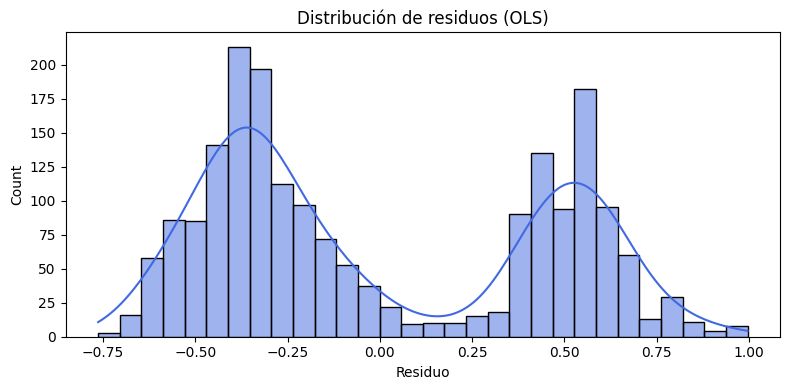

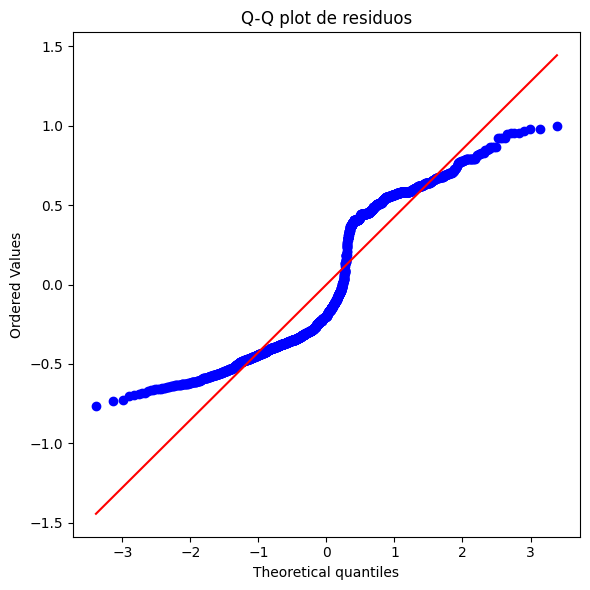

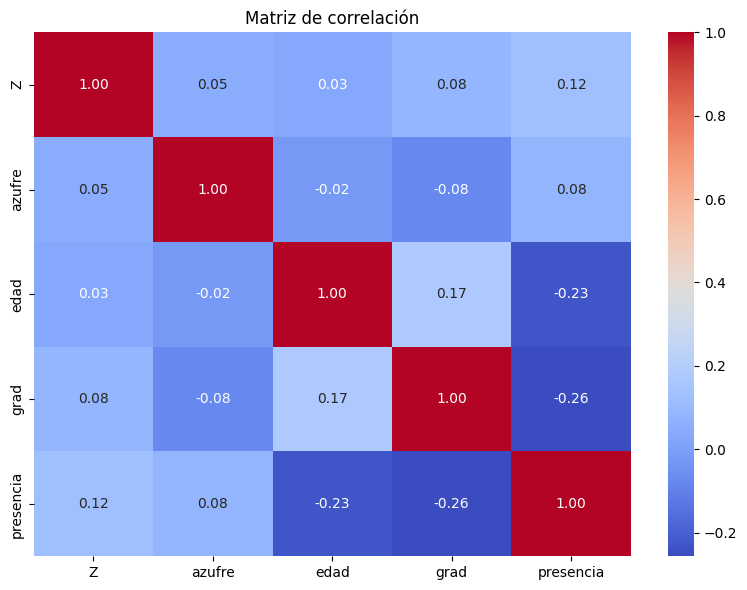

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# === 1. Entrenar modelo ===
model_ols = LinearRegression()
model_ols.fit(X, y)

# === 2. Predicciones y residuos ===
y_pred = model_ols.predict(X)
residuos = y.flatten() - y_pred.flatten()

# === 3. Coeficientes ===
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': model_ols.coef_.flatten()
})
print(coef_df)

# === 4. Métricas ===
print(f"R²: {r2_score(y, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y, y_pred)):.4f}")

# === 5. Gráfico de residuos ===
plt.figure(figsize=(8, 4))
sns.histplot(residuos, bins=30, kde=True, color='royalblue')
plt.title("Distribución de residuos (OLS)")
plt.xlabel("Residuo")
plt.tight_layout()
plt.show()

# === 6. Q-Q plot ===
import scipy.stats as stats
plt.figure(figsize=(6, 6))
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Q-Q plot de residuos")
plt.tight_layout()
plt.show()

# === 7. Matriz de correlación ===
corr = pd.concat([X, pd.DataFrame(y, columns=["presencia"])], axis=1).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de correlación")
plt.tight_layout()
plt.show()


In [106]:
from mgwr.gwr import GWR
from mgwr.sel_bw import Sel_BW
from sklearn.preprocessing import StandardScaler
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# === 1. Prepara coordenadas ===
coords = np.column_stack((gdf_all.geometry.x, gdf_all.geometry.y))

# === 2. Escala variables (GWR requiere estandarización) ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = y  # en regresión logística se usa binaria; en GWR normal puede ir sin escalar

# === 3. Selección de bandwidth óptimo ===
bw = Sel_BW(coords, y_scaled, X_scaled).search()
print(f"Ancho de banda óptimo: {bw}")

# === 4. Ajuste del modelo GWR ===
gwr_model = GWR(coords, y_scaled, X_scaled, bw)
gwr_results = gwr_model.fit()

# === 5. Resumen ===
print(gwr_results.summary())

# === 6. Crear GeoDataFrame con coeficientes locales ===
coef_names = ['Intercepto', 'Z', 'azufre', 'edad', 'grad']
coef_df = pd.DataFrame(gwr_results.params, columns=coef_names)
gdf_coefs = gdf_all.copy()
for name in coef_names:
    gdf_coefs[name] = coef_df[name]




Ancho de banda óptimo: 52.0
Model type                                                         Gaussian
Number of observations:                                                1975
Number of covariates:                                                     5

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                            405.121
Log-likelihood:                                                   -1238.067
AIC:                                                               2486.135
AICc:                                                              2488.178
BIC:                                                             -14543.877
R2:                                                                   0.126
Adj. R2:                                                              0.125

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- 

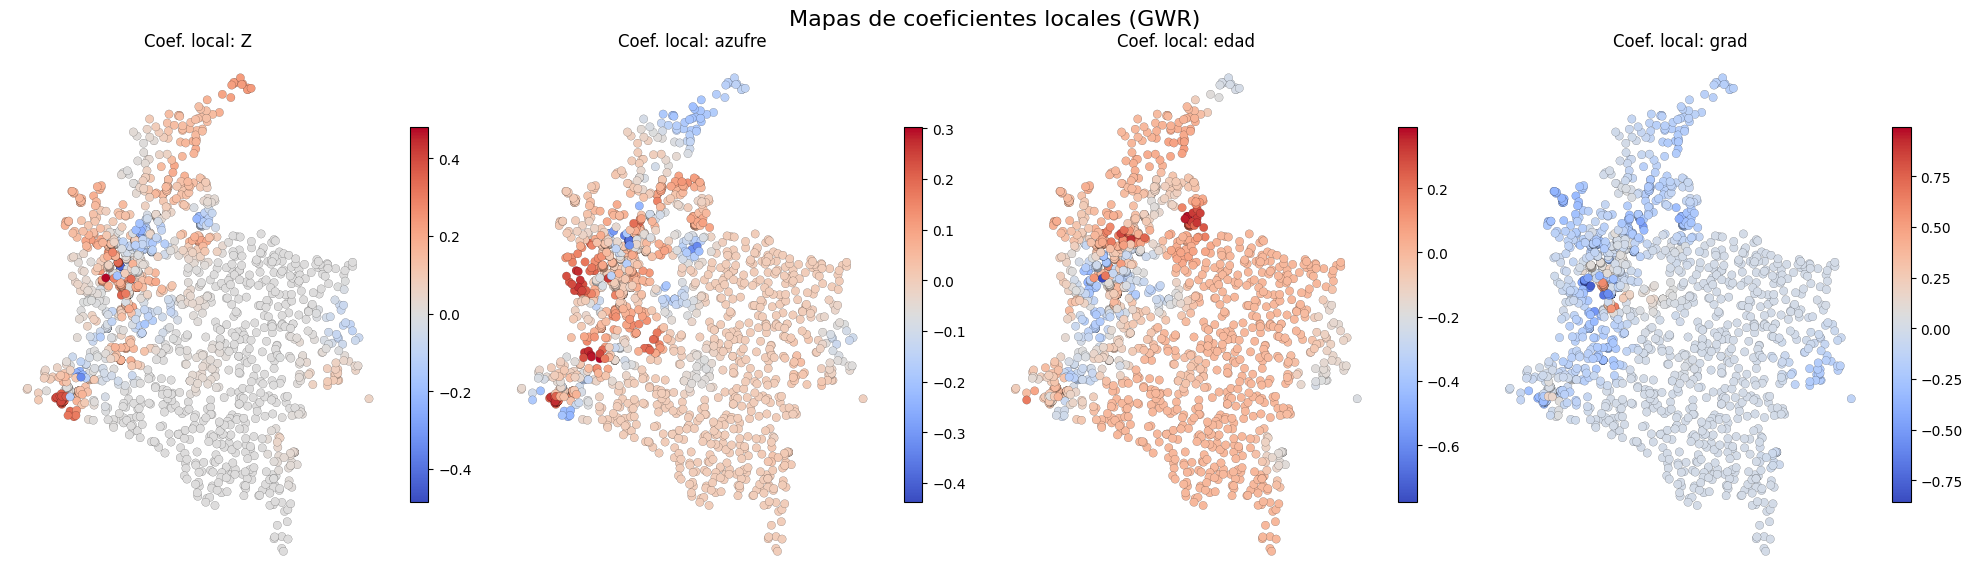

In [107]:
import matplotlib.pyplot as plt

# Coeficientes a mapear (omitimos el intercepto si quieres)
coef_names = ['Z', 'azufre', 'edad', 'grad']

# Crear figura con subplots en una fila
fig, axes = plt.subplots(1, len(coef_names), figsize=(5 * len(coef_names), 6))

for ax, var in zip(axes, coef_names):
    gdf_coefs.plot(
        column=var,
        cmap='coolwarm',
        legend=True,
        ax=ax,
        legend_kwds={'shrink': 0.7},
        edgecolor='black',
        linewidth=0.1
    )
    ax.set_title(f'Coef. local: {var}', fontsize=12)
    ax.axis('off')

plt.suptitle("Mapas de coeficientes locales (GWR)", fontsize=16)
plt.tight_layout()
plt.show()


R²: 0.1336
RMSE: 0.4510

Coeficientes:
Z: 0.0094
azufre: 0.0001
edad: -0.0013
grad: -0.0629


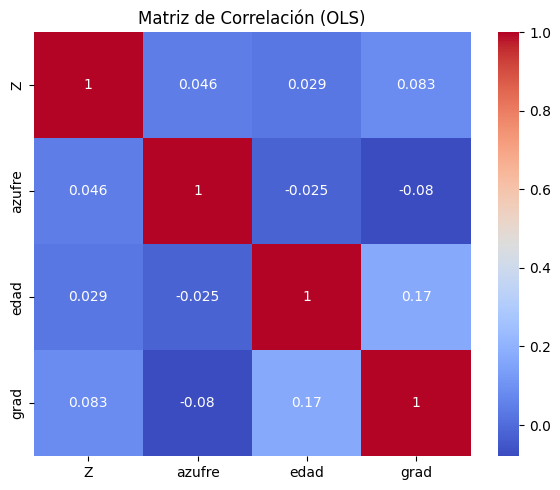

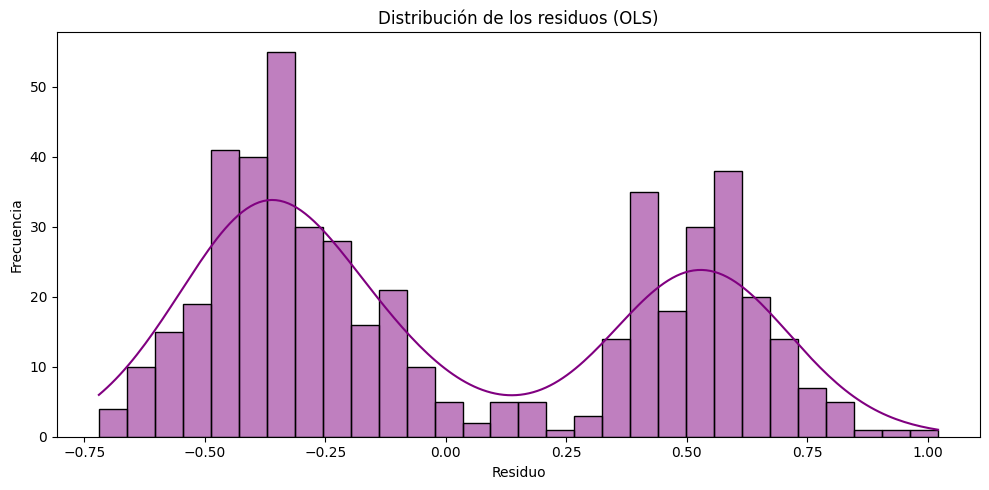

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Datos ===
df = pd.concat([presencias, ausencias])
X = df[['Z', 'azufre', 'edad', 'grad']]
y = df['presencia']

# === 2. Train/test split ===
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# === 3. Modelo OLS ===
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)
y_pred = ols_model.predict(X_test)

# === 4. Métricas ===
r2 = r2_score(y_test, y_pred)
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print("\nCoeficientes:")
for var, coef in zip(X.columns, ols_model.coef_):
    print(f"{var}: {coef:.4f}")

# === 5. Matriz de correlación ===
correlation_matrix = X.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación (OLS)")
plt.tight_layout()
plt.show()

# === 6. Gráfico de residuos ===
residuos = y_test - y_pred

plt.figure(figsize=(10, 5))
sns.histplot(residuos, bins=30, kde=True, color='purple')
plt.title("Distribución de los residuos (OLS)")
plt.xlabel("Residuo")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


In [121]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, log_loss, r2_score, mean_squared_error
from scipy import stats
from esda.moran import Moran
from sklearn.model_selection import train_test_split

# === VARIABLES ===
X_log = df[['Z', 'azufre', 'edad', 'grad']]
y_log = df['presencia'].values

# === 1. ENTRENAR REGRESIÓN LOGÍSTICA ===
X_train, X_test, y_train, y_test = train_test_split(X_log, y_log, test_size=0.2, stratify=y_log, random_state=42)

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# === 2. ENTRENAR MODELO OLS ===
X_ols = X_log.values
y_ols = y_log.reshape(-1, 1)
ols_model = LinearRegression()
ols_model.fit(X_ols, y_ols)

# === 3. INICIAR TABLA DE RESULTADOS ===
resultados = []

# === 4. LOGISTIC ===
y_proba = logistic_model.predict_proba(X_test)[:, 1]
y_pred  = logistic_model.predict(X_test)
acc_log = accuracy_score(y_test, y_pred)
ll_log = -log_loss(y_test, y_proba, normalize=False)
k_log = X_train.shape[1] + 1
aic_log = 2 * k_log - 2 * ll_log
y_log_proba_full = logistic_model.predict_proba(X_log)[:, 1]
residuos_log_full = y_log - y_log_proba_full
mi_log = Moran(residuos_log_full, w)

resultados.append({
    "Modelo": "Logistic",
    "AIC": aic_log,
    "Log-likelihood": ll_log,
    "Coef. espacial": np.nan,
    "Moran's I": mi_log.I,
    "p-valor Moran": mi_log.p_sim,
    "R²": np.nan,
    "Accuracy": acc_log
})

# === 5. SAR ===
y_sar_true = np.concatenate([y_train, y_test])[: len(model_sar.predy)]
y_sar_pred = (model_sar.predy.flatten() > 0.5).astype(int)
acc_sar = accuracy_score(y_sar_true, y_sar_pred)
res_sar = model_sar.u.flatten()
mi_sar = Moran(res_sar, w)
rho_sar = model_sar.rho[0] if hasattr(model_sar.rho, '__len__') else model_sar.rho

resultados.append({
    "Modelo": "SAR (ML_Lag)",
    "AIC": model_sar.aic,
    "Log-likelihood": model_sar.logll,
    "Coef. espacial": rho_sar,
    "Moran's I": mi_sar.I,
    "p-valor Moran": mi_sar.p_sim,
    "R²": model_sar.pr2,
    "Accuracy": acc_sar
})

# === 6. CAR ===
y_car_pred = (model_car.predy.flatten() > 0.5).astype(int)
acc_car = accuracy_score(y_sar_true, y_car_pred)
res_car = model_car.u.flatten()
mi_car = Moran(res_car, w)

resultados.append({
    "Modelo": "CAR (ML_Error)",
    "AIC": model_car.aic,
    "Log-likelihood": model_car.logll,
    "Coef. espacial": model_car.lam,
    "Moran's I": mi_car.I,
    "p-valor Moran": mi_car.p_sim,
    "R²": model_car.pr2,
    "Accuracy": acc_car
})

# === 7. OLS ===
y_ols_pred = ols_model.predict(X_ols).flatten()
res_ols = y_ols.flatten() - y_ols_pred
r2_ols = r2_score(y_ols, y_ols_pred)
mse_ols = mean_squared_error(y_ols, y_ols_pred)
n_ols = len(y_ols)
sigma2 = mse_ols
ll_ols = -0.5 * n_ols * (np.log(2 * np.pi * sigma2) + 1)
k_ols = X_ols.shape[1] + 1
aic_ols = 2 * k_ols - 2 * ll_ols
mi_ols = Moran(res_ols, w)

resultados.append({
    "Modelo": "OLS",
    "AIC": aic_ols,
    "Log-likelihood": ll_ols,
    "Coef. espacial": np.nan,
    "Moran's I": mi_ols.I,
    "p-valor Moran": mi_ols.p_sim,
    "R²": r2_ols,
    "Accuracy": np.nan
})

# === 8. MOSTRAR TABLA ===
df_resultados = pd.DataFrame(resultados)
print(df_resultados)


           Modelo          AIC  Log-likelihood  Coef. espacial  Moran's I  p-valor Moran        R²  Accuracy
0        Logistic   468.709249     -229.354624             NaN   0.616671          0.001       NaN  0.698734
1    SAR (ML_Lag)   752.032098     -370.016049        0.817428  -0.065850          0.001  0.703294  0.519494
2  CAR (ML_Error)   811.498409     -400.749204        0.840554   0.682324          0.001  0.125902  0.616203
3             OLS  2486.134844    -1238.067422             NaN   0.613023          0.001  0.126383       NaN


C:\TEMP\ipykernel_5140\3169197254.py:109: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(gdf_all)
C:\TEMP\ipykernel_5140\3169197254.py:132: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  mask = np.array([gdf_colombia.unary_union.contains(pt) for pt in points_grid])


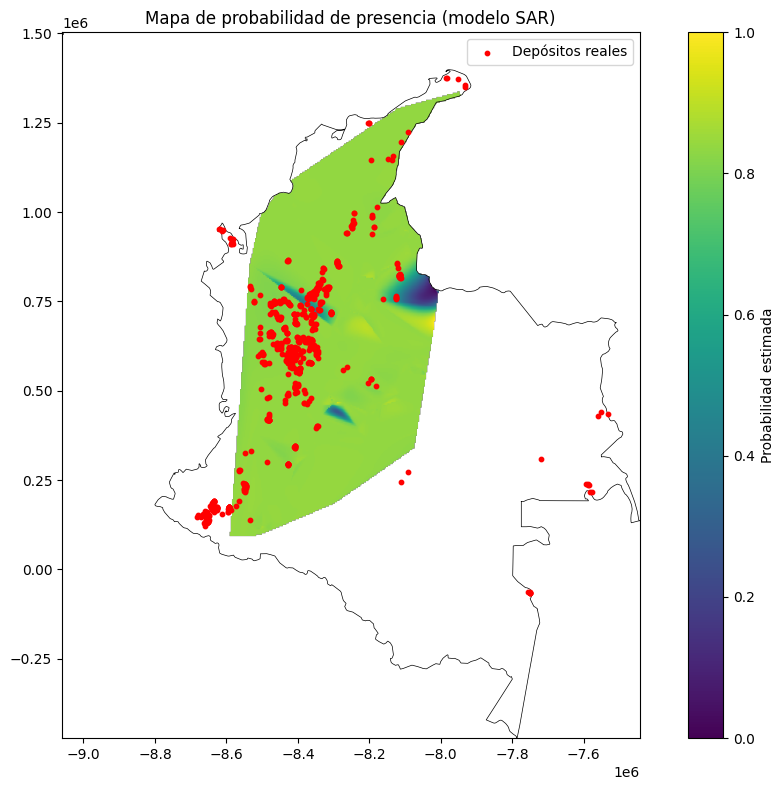

In [126]:
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Point
from shapely.ops import unary_union
from scipy.interpolate import griddata
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from libpysal.weights import Queen
from spreg import ML_Lag

# === 1. Cargar shapefiles ===
gdf_corteza    = gpd.read_file("C:/Git_SCA/AGE/Corteza").to_crs(epsg=3857)
gdf_azufre     = gpd.read_file("C:/Git_SCA/AGE/azufre").to_crs(epsg=3857)
gdf_dataciones = gpd.read_file("C:/Git_SCA/AGE/Dataciones").to_crs(epsg=3857)
gdf_geotermia  = gpd.read_file("C:/Git_SCA/AGE/Geotermica").to_crs(epsg=3857)
gdf_depositos  = gpd.read_file("C:/Git_SCA/AGE/Depositos").to_crs(epsg=3857)
gdf_colombia   = gpd.read_file("C:/Git_SCA/AGE/Area_Col")
gdf_colombia   = gdf_colombia[gdf_colombia.is_valid].to_crs(epsg=3857)

# === 2. Preprocesamiento ===
corteza = gdf_corteza.dropna(subset=['Z'])

az = gdf_azufre.dropna(subset=['VALOR_ORIG','UNIDAD']).copy()
az['VALOR_ORIG'] = pd.to_numeric(az['VALOR_ORIG'], errors='coerce')
az['azufre_ppm'] = np.where(az['UNIDAD'].str.lower()=='per',
                            az['VALOR_ORIG']*10000,
                            az['VALOR_ORIG'])
az = az[az['azufre_ppm']<=1500]

dat = gdf_dataciones.dropna(subset=['EdadMa']).copy()
dat['EdadMa'] = pd.to_numeric(dat['EdadMa'].str.replace(',','.'), errors='coerce')
dat = dat[dat['EdadMa']<=500]

geo = gdf_geotermia.dropna(subset=['GRADIENTE'])
geo = geo[(geo['GRADIENTE']>=20)&(geo['GRADIENTE']<=29)]

# === 3. Interpolación ===
minx, miny, maxx, maxy = gdf_colombia.total_bounds
grid_x, grid_y = np.mgrid[minx:maxx:500j, miny:maxy:500j]

def interpolar(gdf, col):
    return griddata(
        (gdf.geometry.x, gdf.geometry.y),
        gdf[col],
        (grid_x, grid_y),
        method='cubic'  # más suave
    )

grid_z      = interpolar(corteza, 'Z')
grid_azufre = interpolar(az,     'azufre_ppm')
grid_edad   = interpolar(dat,    'EdadMa')
grid_grad   = interpolar(geo,    'GRADIENTE')

def extraer(grid, coords):
    xi = ((coords.x - minx)/(maxx - minx)*499).astype(int)
    yi = ((coords.y - miny)/(maxy - miny)*499).astype(int)
    return grid[xi, yi]
from matplotlib.colors import Normalize
from matplotlib import cm

# Máscara para el área dentro de Colombia
from shapely.geometry import Point
mask = np.full(grid_z.shape, False)

for i in range(grid_z.shape[0]):
    for j in range(grid_z.shape[1]):
        x, y = grid_x[i, j], grid_y[i, j]
        mask[i, j] = area_poly.contains(Point(x, y))
# === 4. Presencias ===
coords_dep = gdf_depositos.geometry
presencias = pd.DataFrame({
    'Z':       extraer(grid_z,      coords_dep),
    'azufre':  extraer(grid_azufre, coords_dep),
    'edad':    extraer(grid_edad,   coords_dep),
    'grad':    extraer(grid_grad,   coords_dep),
    'presencia': 1
}).dropna()

# === 5. Pseudo-ausencias ===
area_poly = unary_union(gdf_colombia.geometry)
np.random.seed(42)
puntos = []
while len(puntos) < 3000:
    x_rand, y_rand = np.random.uniform(minx,maxx), np.random.uniform(miny,maxy)
    p = Point(x_rand, y_rand)
    if area_poly.contains(p):
        puntos.append(p)

gdf_pseudo = gpd.GeoDataFrame(geometry=puntos, crs=gdf_colombia.crs)
ausencias = pd.DataFrame({
    'Z':       extraer(grid_z,      gdf_pseudo.geometry),
    'azufre':  extraer(grid_azufre, gdf_pseudo.geometry),
    'edad':    extraer(grid_edad,   gdf_pseudo.geometry),
    'grad':    extraer(grid_grad,   gdf_pseudo.geometry),
    'presencia': 0
}).dropna()

# === 6. Datos combinados ===
df = pd.concat([presencias, ausencias]).reset_index(drop=True)
all_geoms = list(coords_dep) + puntos[:len(df)-len(coords_dep)]
gdf_all = gpd.GeoDataFrame(df, geometry=all_geoms, crs=gdf_colombia.crs)

X = df[['Z','azufre','edad','grad']]
y = df['presencia'].values.reshape(-1,1)

# === 7. Pesos espaciales ===
w = Queen.from_dataframe(gdf_all)
w.transform = 'r'

# === 8. Modelo SAR ===
model_sar = ML_Lag(y, X.values, w=w,
                   name_y='Presencia',
                   name_x=['Z','azufre','edad','grad'])

# === 9. Mapa de probabilidad ===
flat_X = np.column_stack([
    grid_z.ravel(),
    grid_azufre.ravel(),
    grid_edad.ravel(),
    grid_grad.ravel()
])
intercept = model_sar.betas[0, 0]
betas_X   = model_sar.betas[2:, 0]
pred_lin = intercept + flat_X.dot(betas_X)
prob_map = pred_lin.reshape(grid_z.shape)

# === 10. Enmascarar fuera de Colombia ===
from shapely.geometry import Point
points_grid = [Point(x, y) for x, y in zip(grid_x.ravel(), grid_y.ravel())]
mask = np.array([gdf_colombia.unary_union.contains(pt) for pt in points_grid])
masked_prob_map = np.full(prob_map.shape, np.nan)
masked_prob_map.ravel()[mask] = prob_map.ravel()[mask]

# === 11. Graficar mapa ===
plt.figure(figsize=(10, 8))
plt.imshow(
    masked_prob_map.T,
    extent=(minx, maxx, miny, maxy),
    origin='lower',
    cmap='viridis',
    zorder=1
)
gdf_colombia.boundary.plot(ax=plt.gca(), color='black', linewidth=0.5, zorder=2)
plt.scatter(
    gdf_depositos.geometry.x,
    gdf_depositos.geometry.y,
    color='red',
    s=10,
    label='Depósitos reales',
    zorder=3
)
plt.title("Mapa de probabilidad de presencia (modelo SAR)")
plt.legend()
plt.colorbar(label='Probabilidad estimada')
plt.tight_layout()
plt.show()
gdf_modelo["ajustado"] = modelo_sar.predy.flatten()

fig, ax = plt.subplots(figsize=(10, 10))
area_col.boundary.plot(ax=ax, color='black', linewidth=1)
gdf_modelo.plot(column="ajustado", cmap="viridis", ax=ax, legend=True)
plt.title("Valores ajustados del modelo SAR")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

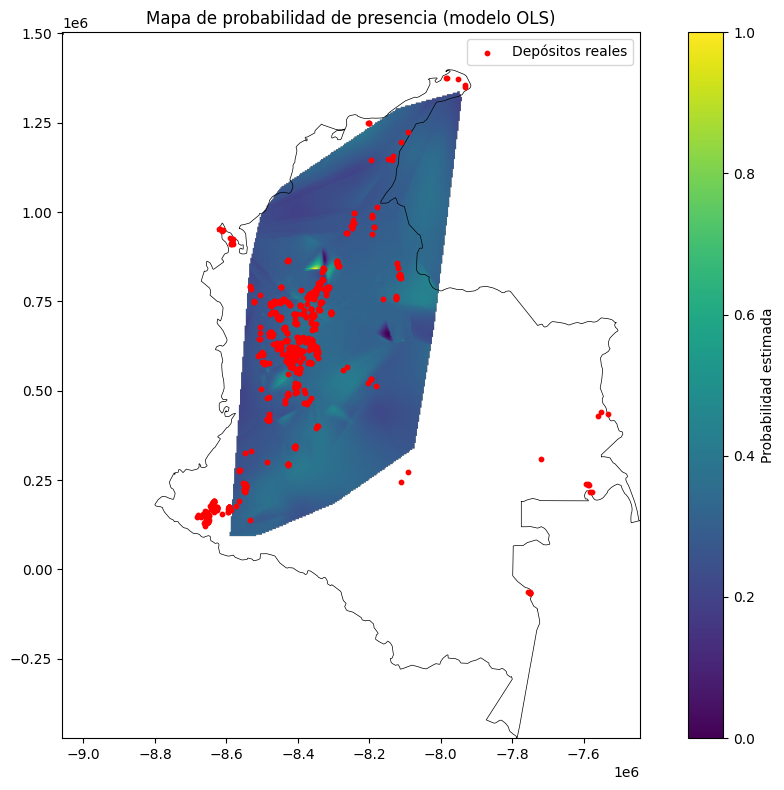

In [128]:

import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Point
from shapely.ops import unary_union
from scipy.interpolate import griddata
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# === 1. Cargar shapefiles ===
gdf_corteza     = gpd.read_file("C:/Git_SCA/AGE/Corteza").to_crs(epsg=3857)
gdf_azufre      = gpd.read_file("C:/Git_SCA/AGE/azufre").to_crs(epsg=3857)
gdf_dataciones  = gpd.read_file("C:/Git_SCA/AGE/Dataciones").to_crs(epsg=3857)
gdf_geotermia   = gpd.read_file("C:/Git_SCA/AGE/Geotermica").to_crs(epsg=3857)
gdf_depositos   = gpd.read_file("C:/Git_SCA/AGE/Depositos").to_crs(epsg=3857)
gdf_colombia    = gpd.read_file("C:/Git_SCA/AGE/Area_Col").to_crs(epsg=3857)
gdf_colombia    = gdf_colombia[gdf_colombia.is_valid]

# === 2. Preprocesamiento ===
corteza = gdf_corteza.dropna(subset=['Z'])

az = gdf_azufre.dropna(subset=['VALOR_ORIG','UNIDAD']).copy()
az['VALOR_ORIG'] = pd.to_numeric(az['VALOR_ORIG'], errors='coerce')
az['azufre_ppm'] = np.where(az['UNIDAD'].str.lower()=='per',
                            az['VALOR_ORIG']*10000,
                            az['VALOR_ORIG'])
az = az[az['azufre_ppm']<=1500]

dat = gdf_dataciones.dropna(subset=['EdadMa']).copy()
dat['EdadMa'] = pd.to_numeric(dat['EdadMa'].str.replace(',','.'), errors='coerce')
dat = dat[dat['EdadMa']<=500]

geo = gdf_geotermia.dropna(subset=['GRADIENTE'])
geo = geo[(geo['GRADIENTE']>=20)&(geo['GRADIENTE']<=29)]

# === 3. Interpolación ===
minx, miny, maxx, maxy = gdf_colombia.total_bounds
grid_x, grid_y = np.mgrid[minx:maxx:500j, miny:maxy:500j]

def interpolar(gdf, col):
    return griddata(
        (gdf.geometry.x, gdf.geometry.y),
        gdf[col],
        (grid_x, grid_y),
        method='cubic'  # Más suave
    )

grid_z      = interpolar(corteza, 'Z')
grid_azufre = interpolar(az,     'azufre_ppm')
grid_edad   = interpolar(dat,    'EdadMa')
grid_grad   = interpolar(geo,    'GRADIENTE')

def extraer(grid, coords):
    xi = ((coords.x - minx)/(maxx - minx)*499).astype(int)
    yi = ((coords.y - miny)/(maxy - miny)*499).astype(int)
    return grid[xi, yi]

# === 4. Presencias ===
coords_dep = gdf_depositos.geometry
pres = pd.DataFrame({
    'Z':      extraer(grid_z,      coords_dep),
    'azufre': extraer(grid_azufre, coords_dep),
    'edad':   extraer(grid_edad,   coords_dep),
    'grad':   extraer(grid_grad,   coords_dep),
    'presencia': 1
}).dropna()

# === 5. Pseudo-ausencias ===
area_poly = unary_union(gdf_colombia.geometry)
np.random.seed(42)
pts = []
while len(pts) < 3000:
    p = Point(np.random.uniform(minx,maxx), np.random.uniform(miny,maxy))
    if area_poly.contains(p):
        pts.append(p)

gdf_pseudo = gpd.GeoDataFrame(geometry=pts, crs=gdf_colombia.crs)
pseudo = pd.DataFrame({
    'Z':      extraer(grid_z,      gdf_pseudo.geometry),
    'azufre': extraer(grid_azufre, gdf_pseudo.geometry),
    'edad':   extraer(grid_edad,   gdf_pseudo.geometry),
    'grad':   extraer(grid_grad,   gdf_pseudo.geometry),
    'presencia': 0
}).dropna()

# === 6. Unir datos y entrenar modelo ===
df = pd.concat([pres, pseudo], ignore_index=True)
X = df[['Z', 'azufre', 'edad', 'grad']]
y = df['presencia']

model = LinearRegression()
model.fit(X, y)

# === 7. Crear mapa de predicción ===
flat_X = np.column_stack([
    grid_z.ravel(),
    grid_azufre.ravel(),
    grid_edad.ravel(),
    grid_grad.ravel()
])
pred_lin = model.intercept_ + flat_X.dot(model.coef_)
prob_map = pred_lin.reshape(grid_z.shape)

# === 8. Visualización ===
plt.figure(figsize=(10, 8))
plt.imshow(
    prob_map.T,
    extent=(minx, maxx, miny, maxy),
    origin='lower',
    cmap='viridis',
    zorder=1
)
gdf_colombia.boundary.plot(ax=plt.gca(), color='black', linewidth=0.5, zorder=2)
plt.scatter(
    gdf_depositos.geometry.x,
    gdf_depositos.geometry.y,
    color='red',
    s=10,
    label='Depósitos reales',
    zorder=3
)
plt.title("Mapa de probabilidad de presencia (modelo OLS)")
plt.legend()
plt.colorbar(label='Probabilidad estimada')
plt.tight_layout()
plt.show()


C:\TEMP\ipykernel_16264\1469312950.py:99: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(gdf_all)


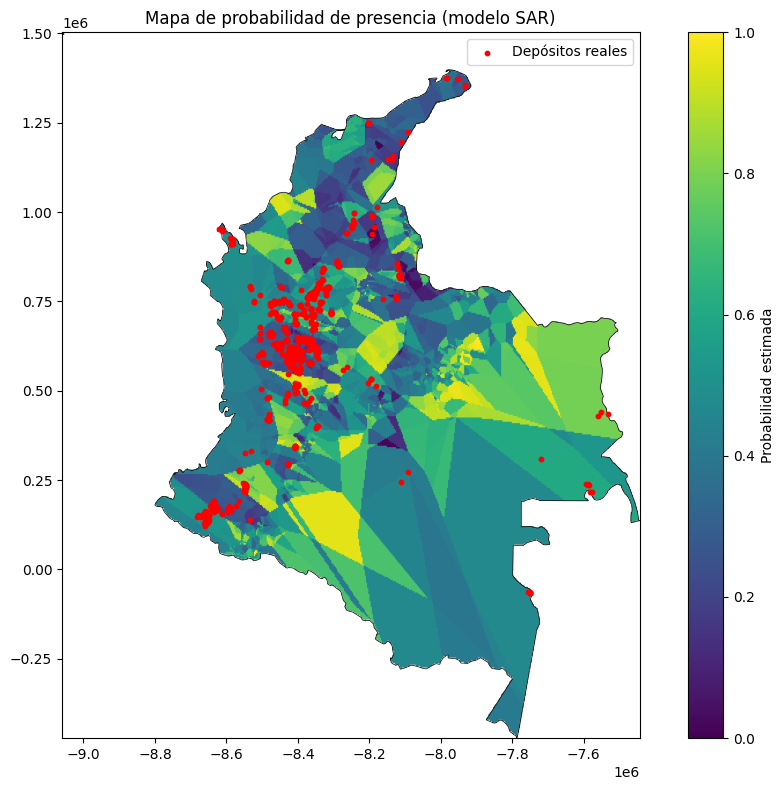

In [5]:
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Point
from shapely.ops import unary_union
from scipy.interpolate import griddata
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from libpysal.weights import Queen
from spreg import ML_Lag

# === 1. Cargar shapefiles ===
gdf_corteza    = gpd.read_file("C:/Git_SCA/AGE/Corteza").to_crs(epsg=3857)
gdf_azufre     = gpd.read_file("C:/Git_SCA/AGE/azufre").to_crs(epsg=3857)
gdf_dataciones = gpd.read_file("C:/Git_SCA/AGE/Dataciones").to_crs(epsg=3857)
gdf_geotermia  = gpd.read_file("C:/Git_SCA/AGE/Geotermica").to_crs(epsg=3857)
gdf_depositos  = gpd.read_file("C:/Git_SCA/AGE/Depositos").to_crs(epsg=3857)
gdf_colombia   = gpd.read_file("C:/Git_SCA/AGE/Area_Col")
gdf_colombia   = gdf_colombia[gdf_colombia.is_valid].to_crs(epsg=3857)

# === 2. Preprocesamiento ===
corteza = gdf_corteza.dropna(subset=['Z'])

az = gdf_azufre.dropna(subset=['VALOR_ORIG','UNIDAD']).copy()
az['VALOR_ORIG'] = pd.to_numeric(az['VALOR_ORIG'], errors='coerce')
az['azufre_ppm'] = np.where(az['UNIDAD'].str.lower()=='per',
                            az['VALOR_ORIG']*10000,
                            az['VALOR_ORIG'])
az = az[az['azufre_ppm']<=1500]

dat = gdf_dataciones.dropna(subset=['EdadMa']).copy()
dat['EdadMa'] = pd.to_numeric(dat['EdadMa'].str.replace(',','.'), errors='coerce')
dat = dat[dat['EdadMa']<=500]

geo = gdf_geotermia.dropna(subset=['GRADIENTE'])
geo = geo[(geo['GRADIENTE']>=20)&(geo['GRADIENTE']<=29)]

# === 3. Interpolación ===
minx, miny, maxx, maxy = gdf_colombia.total_bounds
grid_x, grid_y = np.mgrid[minx:maxx:500j, miny:maxy:500j]

def interpolar(gdf, col):
    return griddata(
        (gdf.geometry.x, gdf.geometry.y),
        gdf[col],
        (grid_x, grid_y),
        method='nearest'
    )

grid_z      = interpolar(corteza, 'Z')
grid_azufre = interpolar(az,     'azufre_ppm')
grid_edad   = interpolar(dat,    'EdadMa')
grid_grad   = interpolar(geo,    'GRADIENTE')

def extraer(grid, coords):
    n_x, n_y = grid.shape  # Tamaño real de la grilla
    xi = ((coords.x - minx)/(maxx - minx)*(n_x - 1)).astype(int)
    yi = ((coords.y - miny)/(maxy - miny)*(n_y - 1)).astype(int)
    return grid[xi, yi]

# === 4. Presencias ===
area_poly = unary_union(gdf_colombia.geometry)
coords_dep = gdf_depositos.geometry
presencias = pd.DataFrame({
    'Z':       extraer(grid_z,      coords_dep),
    'azufre':  extraer(grid_azufre, coords_dep),
    'edad':    extraer(grid_edad,   coords_dep),
    'grad':    extraer(grid_grad,   coords_dep),
    'presencia': 1
}).dropna()

# === 5. Pseudo-ausencias ===
np.random.seed(42)
puntos = []
while len(puntos) < 3000:
    x_rand, y_rand = np.random.uniform(minx,maxx), np.random.uniform(miny,maxy)
    p = Point(x_rand, y_rand)
    if area_poly.contains(p):
        puntos.append(p)

gdf_pseudo = gpd.GeoDataFrame(geometry=puntos, crs=gdf_colombia.crs)
ausencias = pd.DataFrame({
    'Z':       extraer(grid_z,      gdf_pseudo.geometry),
    'azufre':  extraer(grid_azufre, gdf_pseudo.geometry),
    'edad':    extraer(grid_edad,   gdf_pseudo.geometry),
    'grad':    extraer(grid_grad,   gdf_pseudo.geometry),
    'presencia': 0
}).dropna()

# === 6. Datos combinados ===
df = pd.concat([presencias, ausencias]).reset_index(drop=True)
all_geoms = list(coords_dep) + puntos[:len(df)-len(coords_dep)]
gdf_all = gpd.GeoDataFrame(df, geometry=all_geoms, crs=gdf_colombia.crs)

X = df[['Z','azufre','edad','grad']]
y = df['presencia'].values.reshape(-1,1)

# === 7. Pesos espaciales ===
w = Queen.from_dataframe(gdf_all)
w.transform = 'r'

# === 8. Modelo SAR ===
model_sar = ML_Lag(y, X.values, w=w,
                   name_y='Presencia',
                   name_x=['Z','azufre','edad','grad'])

# === 9. Mapa de probabilidad ===
flat_X = np.column_stack([
    grid_z.ravel(),
    grid_azufre.ravel(),
    grid_edad.ravel(),
    grid_grad.ravel()
])

intercept = model_sar.betas[0, 0]
betas_X   = model_sar.betas[2:, 0]  # omite rho
pred_lin  = intercept + flat_X.dot(betas_X)
prob_map  = pred_lin.reshape(grid_z.shape)

# === 10. Enmascarar fuera de Colombia ===
from shapely.geometry import Point
points_grid = [Point(x, y) for x, y in zip(grid_x.ravel(), grid_y.ravel())]
mask = np.array([area_poly.contains(pt) for pt in points_grid])
masked_prob_map = np.full(prob_map.shape, np.nan)
masked_prob_map.ravel()[mask] = prob_map.ravel()[mask]

# === 11. Graficar mapa ===
plt.figure(figsize=(10, 8))
plt.imshow(
    masked_prob_map.T,
    extent=(minx, maxx, miny, maxy),
    origin='lower',
    cmap='viridis',
    zorder=1
)
gdf_colombia.boundary.plot(ax=plt.gca(), color='black', linewidth=0.5, zorder=2)
plt.scatter(
    gdf_depositos.geometry.x,
    gdf_depositos.geometry.y,
    color='red',
    s=10,
    label='Depósitos reales',
    zorder=3
)
plt.title("Mapa de probabilidad de presencia (modelo SAR)")
plt.legend()
plt.colorbar(label='Probabilidad estimada')
plt.tight_layout()
plt.show()


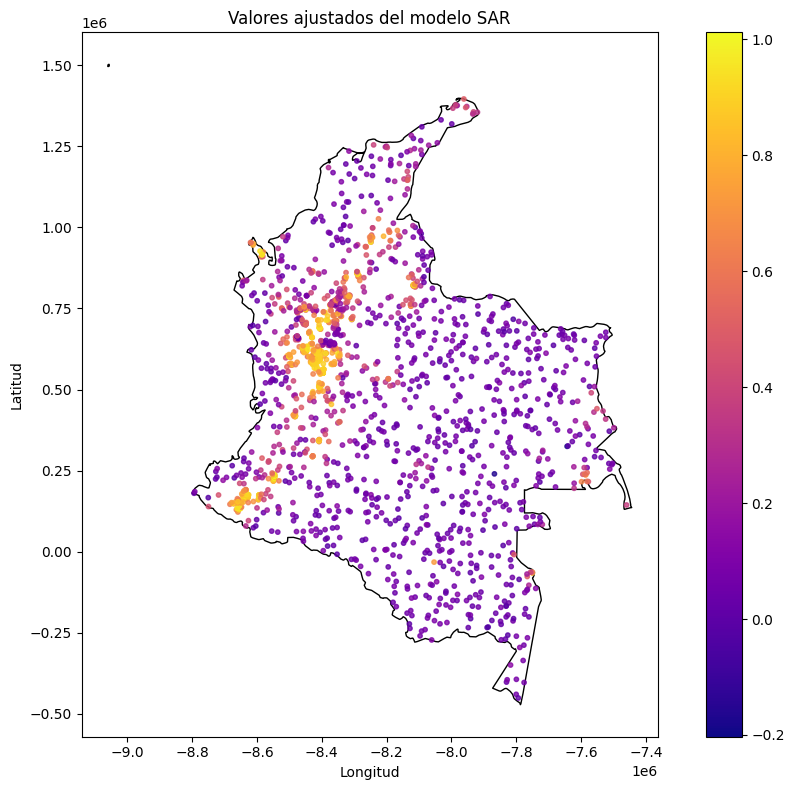

In [131]:
# === 12. Mapa de valores ajustados del modelo SAR ===
gdf_all["ajustado"] = model_sar.predy.flatten()

fig, ax = plt.subplots(figsize=(10, 8))
gdf_colombia.boundary.plot(ax=ax, color='black', linewidth=1)
gdf_all.plot(column="ajustado", cmap="plasma", ax=ax, legend=True, 
             markersize=10, alpha=0.8, zorder=2)

plt.title("Valores ajustados del modelo SAR")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.tight_layout()
plt.show()

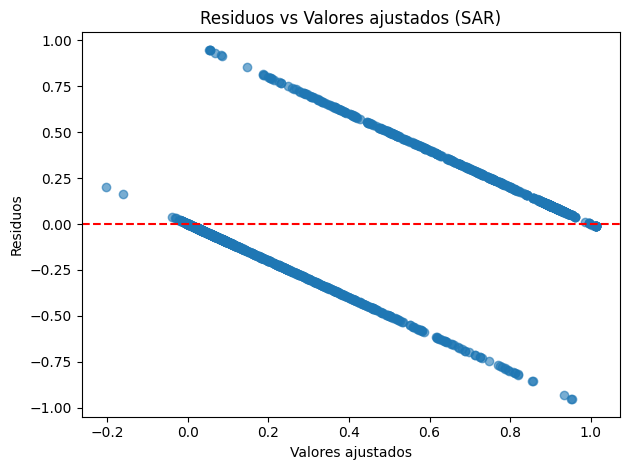

In [133]:
plt.scatter(model_sar.predy.flatten(), model_sar.u.flatten(), alpha=0.6)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Valores ajustados")
plt.ylabel("Residuos")
plt.title("Residuos vs Valores ajustados (SAR)")
plt.tight_layout()
plt.show()
